# Validate on hold-out, version zero

In [78]:
from IPython.display import Image

In [82]:
ls 

DAG_smpl_effct_repo.drawio           bx_crv_itr4.ipynb
DAG_smpl_effct_repo.jpg              c_latent_sampling.ipynb
Few_shot.drawio                      data_aug_deepmind.jpg
Few_shot.drawio.png                  data_aug_deepmind.svg
PDF.ipynb                            figure_five.ipynb
Zero_shot.drawio                     figure_five_v2.ipynb
Zero_shot.drawio.png                 four_way.drawio
augmented_policy_cloning.jpg         four_way.drawio.png
augmented_policy_cloning.svg         i_o/
box_and_whiskers.ipynb               learning_curve_schematic.drawio
box_and_whiskers_BRCA.ipynb          learning_curve_schematic.drawio.png
box_and_whiskers_LGGGBM.ipynb        learning_curve_schematic_v2.drawio
box_curve.ipynb                      learning_curve_schematic_v2.jpg
box_curve_itr1.ipynb                 shuffle.ipynb
bx_crv_itr2.ipynb                    val_0.ipynb
bx_crv_itr3.ipynb


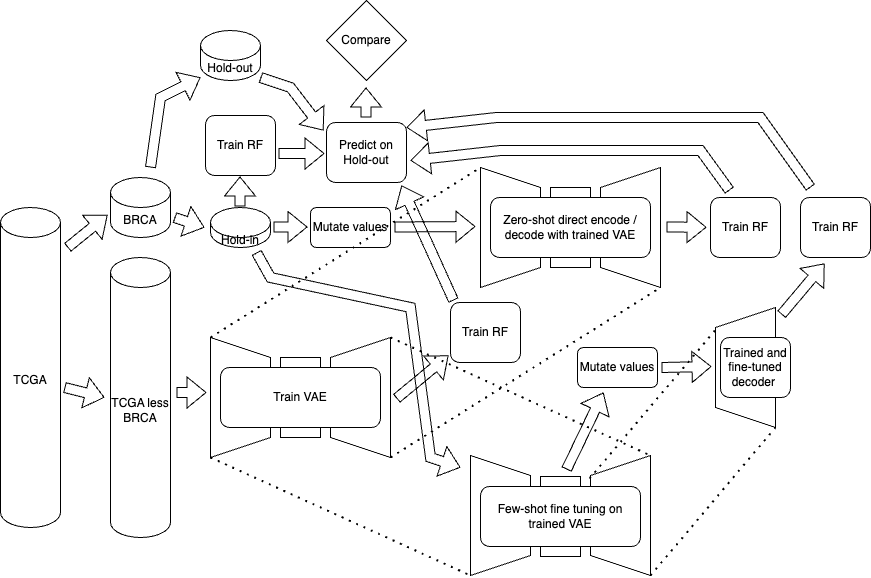

In [85]:
Image('four_way.drawio.png', width = 800)

## Setup, notes, imports

In [ ]:
From box curve series, last was version 4

In [ ]:
# Train RF on hold-in, predict on hold-out
# Train RF on decoded, predict on hold-out
# Train RF on synth, predict on hold-out
# Train RF on blends, preict on hold-out

In [ ]:
# Old notes:

# Two repeats at sample size 50, itr4

# Run an ensemble through the learning curve - later
# Compare a raw sample mutation vs latent fuzzing - later
    # Write a raw sample mutatated object
    # Extract a trained encoder

# Run on smaller cancer sizes - once method devel complete

In [2]:
%whos

Interactive namespace is empty.


In [ ]:
# Tickler
    # UMAP
    # Scatter plots, gene / sample
    # RMSE
    # MSigDB

## Imports

In [ ]:
# Working out of Synthetic sample generation manuscript doc
# And corresponding figure draft google slides, companion doc, and PaperPile

In [3]:
import seaborn as sns
import pandas as pd
import glob as glob
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from statistics import mean
from statistics import stdev
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import time
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.layers import BatchNormalization, Activation, Layer
from tensorflow.keras import metrics, optimizers
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.callbacks import Callback
import tensorflow.compat.v1.keras.backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
from matplotlib import rcParams # This is new; jam the labels up on the box star plot
# UMAP is missing (?)
from random import sample
from sklearn.metrics import accuracy_score

## Data

### Big Results Matrix

In [ ]:
brm = pd.read_csv('/Users/karlberb/Documents/work/GDAN_TMP/big_results_matrix.tsv',
                  sep = '\t',
                  index_col = 0)
print(len(brm))
owf1 = brm[brm.performance_metric == 'overall_weighted_f1']
del(brm)

In [ ]:
412,585 # count of sk learn models?

In [ ]:
c = 'ACC'

In [5]:
c = 'BRCA'

In [158]:
c

'BRCA'

In [352]:
c_owf1 = owf1[owf1.cohort == c]

In [353]:
c_owf1_sk = c_owf1[c_owf1.model.str.contains('skgrid')]

In [354]:
c_owf1_sk.sort_values('Mean') #

,cohort,model,performance_metric,Mean,Median,Std,StdMed,SEM,Count,Max,...,subtypes_defined_by_Histology,subtypes_defined_by_iCluster,subtypes_defined_by_COCA,subtypes_defined_by_Other,total_features,GEXP_features,CNVR_features,METH_features,MIR_features,MUTA_features
featureID,,,,,,,,,,,,,,,,,,,,,
skgrid_ACC_fbedeBIC_perplatformMUTA_ACC,ACC,"skgrid_KNeighbors(algorithm=brute,leaf_size=45...",overall_weighted_f1,0.140,0.125,0.0640,0.0658,0.0143,20,0.383333,...,NaN,NaN,NaN,NaN,2,0,0,0,0,2
skgrid_ACC_fbedeBIC_perplatformMUTA_ACC,ACC,"skgrid_KNeighbors(algorithm=kd_tree,leaf_size=...",overall_weighted_f1,0.140,0.125,0.0640,0.0658,0.0143,20,0.383333,...,NaN,NaN,NaN,NaN,2,0,0,0,0,2
skgrid_ACC_fbedeBIC_perplatformMUTA_ACC,ACC,"skgrid_KNeighbors(algorithm=kd_tree,leaf_size=...",overall_weighted_f1,0.140,0.125,0.0640,0.0658,0.0143,20,0.383333,...,NaN,NaN,NaN,NaN,2,0,0,0,0,2
skgrid_ACC_fbedeBIC_perplatformMUTA_ACC,ACC,"skgrid_KNeighbors(algorithm=kd_tree,leaf_size=...",overall_weighted_f1,0.140,0.125,0.0640,0.0658,0.0143,20,0.383333,...,NaN,NaN,NaN,NaN,2,0,0,0,0,2
skgrid_ACC_fbedeBIC_perplatformMUTA_ACC,ACC,"skgrid_KNeighbors(algorithm=brute,leaf_size=45...",overall_weighted_f1,0.140,0.125,0.0640,0.0658,0.0143,20,0.383333,...,NaN,NaN,NaN,NaN,2,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
skgrid_ACC_fbedeBIC_perplatformGEXP_ACC,ACC,"skgrid_LogisticRegression(C=0.01,max_iter=500,...",overall_weighted_f1,0.864,0.853,0.0680,0.0689,0.0152,20,1.000000,...,NaN,NaN,NaN,NaN,5,5,0,0,0,0
skgrid_ACC_fbedeBIC_perplatformALL_ACC,ACC,"skgrid_LogisticRegression(C=0.01,max_iter=500,...",overall_weighted_f1,0.864,0.863,0.0782,0.0782,0.0174,20,1.000000,...,NaN,NaN,NaN,NaN,28,5,9,8,4,2
skgrid_ACC_fbedeBIC_perplatformALL_ACC,ACC,"skgrid_ExtraTrees(criterion=entropy,n_estimato...",overall_weighted_f1,0.864,0.864,0.0645,0.0645,0.0144,20,1.000000,...,NaN,NaN,NaN,NaN,28,5,9,8,4,2


In [356]:
len(c_owf1_sk.model.unique()) # Looking for classifiers with two hyperparameters to make a heatmap

# Could lock a third HP then heatmap then remaining two

6209

In [358]:
c_owf1_sk[c_owf1_sk.model.str.contains('BernoulliNB')]

,cohort,model,performance_metric,Mean,Median,Std,StdMed,SEM,Count,Max,...,subtypes_defined_by_Histology,subtypes_defined_by_iCluster,subtypes_defined_by_COCA,subtypes_defined_by_Other,total_features,GEXP_features,CNVR_features,METH_features,MIR_features,MUTA_features
featureID,,,,,,,,,,,,,,,,,,,,,
skgrid_ACC_fbedeBIC_combined_ACC,ACC,skgrid_BernoulliNB(alpha=0.1)|skgrid_ACC.tsv_s...,overall_weighted_f1,0.335,0.351,0.0725,0.0741,0.0162,20,0.530920,...,NaN,NaN,NaN,NaN,5,3,0,1,1,0
skgrid_ACC_fbedeBIC_perplatformALL_ACC,ACC,skgrid_BernoulliNB(alpha=0.1)|skgrid_ACC.tsv_s...,overall_weighted_f1,0.647,0.614,0.1180,0.1220,0.0264,20,0.919658,...,NaN,NaN,NaN,NaN,28,5,9,8,4,2
skgrid_ACC_fbedeBIC_perplatformCNVR_ACC,ACC,skgrid_BernoulliNB(alpha=0.1)|skgrid_ACC.tsv_s...,overall_weighted_f1,0.631,0.621,0.1100,0.1110,0.0247,20,0.842735,...,NaN,NaN,NaN,NaN,9,0,9,0,0,0
skgrid_ACC_fbedeBIC_perplatformGEXP_ACC,ACC,skgrid_BernoulliNB(alpha=0.1)|skgrid_ACC.tsv_s...,overall_weighted_f1,0.263,0.266,0.0201,0.0202,0.0045,20,0.291498,...,NaN,NaN,NaN,NaN,5,5,0,0,0,0
skgrid_ACC_fbedeBIC_perplatformMETH_ACC,ACC,skgrid_BernoulliNB(alpha=0.1)|skgrid_ACC.tsv_s...,overall_weighted_f1,0.263,0.266,0.0201,0.0202,0.0045,20,0.291498,...,NaN,NaN,NaN,NaN,8,0,0,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
skgrid_ACC_rfe15_perplatformALL_ACC,ACC,skgrid_BernoulliNB(alpha=1.0)|skgrid_ACC.tsv_s...,overall_weighted_f1,0.642,0.648,0.0649,0.0652,0.0145,20,0.746154,...,NaN,NaN,NaN,NaN,60,15,15,15,15,0
skgrid_ACC_rfe15_perplatformCNVR_ACC,ACC,skgrid_BernoulliNB(alpha=1.0)|skgrid_ACC.tsv_s...,overall_weighted_f1,0.670,0.681,0.0821,0.0828,0.0183,20,0.802083,...,NaN,NaN,NaN,NaN,15,0,15,0,0,0
skgrid_ACC_rfe15_perplatformGEXP_ACC,ACC,skgrid_BernoulliNB(alpha=1.0)|skgrid_ACC.tsv_s...,overall_weighted_f1,0.263,0.266,0.0201,0.0202,0.0045,20,0.291498,...,NaN,NaN,NaN,NaN,15,15,0,0,0,0


In [360]:
len(c_owf1_sk[c_owf1_sk.model.str.contains('BernoulliNB')].model.unique())

130

In [ ]:
c_owf1_sk[c_owf1_sk.model.str.contains('BernoulliNB')].model.unique() # Could use feature set as heatmap axis

In [ ]:
c_owf1_sk[c_owf1_sk.model.str.contains('GaussianProcess')].model.unique() # Only has kernel varying

In [ ]:
c_owf1_sk[c_owf1_sk.model.str.contains('DecisionTree')].model.unique() # criterion is binary, then max depth and sample split across
                                                                        # feature sets

In [ ]:
class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', # Here
                                          splitter='best', max_depth=None, # Here
                                          min_samples_split=2, # Here
                                          min_samples_leaf=1,
                                          min_weight_fraction_leaf=0.0,
                                          max_features=None, random_state=None,
                                          max_leaf_nodes=None, min_impurity_decrease=0.0,
                                          class_weight=None, ccp_alpha=0.0)

In [ ]:
c_owf1_sk[c_owf1_sk.model.str.contains('ExtraTrees')].model.unique() # criterion is binary, then max depth and sample split across
                                                                        # feature sets

In [ ]:
class sklearn.ensemble.ExtraTreesClassifier(n_estimators=100, *, criterion='gini', # 96 is default (with gini)
                                            max_depth=None, min_samples_split=2,
                                            min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                            max_features='sqrt', max_leaf_nodes=None,
                                            min_impurity_decrease=0.0, bootstrap=False,
                                            oob_score=False, n_jobs=None, random_state=None,
                                            verbose=0, warm_start=False, class_weight=None,
                                            ccp_alpha=0.0, max_samples=None)[source]

In [368]:
c_owf1_sk[c_owf1_sk.model.str.contains('KNeighbors')].model.unique() # algo, leaf_size, n_neighbs

array(['skgrid_KNeighbors(algorithm=auto,leaf_size=15,n_neighbors=1,p=1)|skgrid_ACC.tsv_skgrid_ACC_fbedeBIC_combined|ACC.tsv_skgrid_ACC_fbedeBIC_combined|2021-01-13|c',
       'skgrid_KNeighbors(algorithm=auto,leaf_size=15,n_neighbors=1,p=1)|skgrid_ACC.tsv_skgrid_ACC_fbedeBIC_perplatformALL|ACC.tsv_skgrid_ACC_fbedeBIC_perplatformALL|2021-01-13|c',
       'skgrid_KNeighbors(algorithm=auto,leaf_size=15,n_neighbors=1,p=1)|skgrid_ACC.tsv_skgrid_ACC_fbedeBIC_perplatformCNVR|ACC.tsv_skgrid_ACC_fbedeBIC_perplatformCNVR|2021-01-13|c',
       ...,
       'skgrid_KNeighbors(algorithm=kd_tree,leaf_size=45,n_neighbors=7,p=5)|skgrid_ACC.tsv_skgrid_ACC_rfe15_perplatformGEXP|ACC.tsv_skgrid_ACC_rfe15_perplatformGEXP|2021-01-13|c',
       'skgrid_KNeighbors(algorithm=kd_tree,leaf_size=45,n_neighbors=7,p=5)|skgrid_ACC.tsv_skgrid_ACC_rfe15_perplatformMETH|ACC.tsv_skgrid_ACC_rfe15_perplatformMETH|2021-01-13|c',
       'skgrid_KNeighbors(algorithm=kd_tree,leaf_size=45,n_neighbors=7,p=5)|skgrid_ACC.tsv_skgr

In [370]:
c_owf1_sk[c_owf1_sk.model.str.contains('BernoulliNB')].sort_values('Mean')

,cohort,model,performance_metric,Mean,Median,Std,StdMed,SEM,Count,Max,...,subtypes_defined_by_Histology,subtypes_defined_by_iCluster,subtypes_defined_by_COCA,subtypes_defined_by_Other,total_features,GEXP_features,CNVR_features,METH_features,MIR_features,MUTA_features
featureID,,,,,,,,,,,,,,,,,,,,,
skgrid_ACC_rfe15_perplatformMIR_ACC,ACC,skgrid_BernoulliNB(alpha=0.5)|skgrid_ACC.tsv_s...,overall_weighted_f1,0.263,0.266,0.0201,0.0202,0.0045,20,0.291498,...,NaN,NaN,NaN,NaN,15,0,0,0,15,0
skgrid_ACC_fbedeBIC_perplatformGEXP_ACC,ACC,skgrid_BernoulliNB(alpha=0.7)|skgrid_ACC.tsv_s...,overall_weighted_f1,0.263,0.266,0.0201,0.0202,0.0045,20,0.291498,...,NaN,NaN,NaN,NaN,5,5,0,0,0,0
skgrid_ACC_rfe15_perplatformMIR_ACC,ACC,skgrid_BernoulliNB(alpha=0.6)|skgrid_ACC.tsv_s...,overall_weighted_f1,0.263,0.266,0.0201,0.0202,0.0045,20,0.291498,...,NaN,NaN,NaN,NaN,15,0,0,0,15,0
skgrid_ACC_rfe15_perplatformMETH_ACC,ACC,skgrid_BernoulliNB(alpha=0.6)|skgrid_ACC.tsv_s...,overall_weighted_f1,0.263,0.266,0.0201,0.0202,0.0045,20,0.291498,...,NaN,NaN,NaN,NaN,15,0,0,15,0,0
skgrid_ACC_rfe15_perplatformGEXP_ACC,ACC,skgrid_BernoulliNB(alpha=0.6)|skgrid_ACC.tsv_s...,overall_weighted_f1,0.263,0.266,0.0201,0.0202,0.0045,20,0.291498,...,NaN,NaN,NaN,NaN,15,15,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
skgrid_ACC_fbedeBIC_perplatformALL_ACC,ACC,skgrid_BernoulliNB(alpha=0.6)|skgrid_ACC.tsv_s...,overall_weighted_f1,0.669,0.668,0.1030,0.1030,0.0232,20,0.918343,...,NaN,NaN,NaN,NaN,28,5,9,8,4,2
skgrid_ACC_rfe15_perplatformCNVR_ACC,ACC,skgrid_BernoulliNB(alpha=1.0)|skgrid_ACC.tsv_s...,overall_weighted_f1,0.670,0.681,0.0821,0.0828,0.0183,20,0.802083,...,NaN,NaN,NaN,NaN,15,0,15,0,0,0
skgrid_ACC_rfe15_perplatformALL_ACC,ACC,skgrid_BernoulliNB(alpha=0.1)|skgrid_ACC.tsv_s...,overall_weighted_f1,0.670,0.676,0.0694,0.0696,0.0155,20,0.802083,...,NaN,NaN,NaN,NaN,60,15,15,15,15,0


In [373]:
c_owf1_sk[c_owf1_sk.model.str.contains('ExtraTrees')].sort_values('Mean')

,cohort,model,performance_metric,Mean,Median,Std,StdMed,SEM,Count,Max,...,subtypes_defined_by_Histology,subtypes_defined_by_iCluster,subtypes_defined_by_COCA,subtypes_defined_by_Other,total_features,GEXP_features,CNVR_features,METH_features,MIR_features,MUTA_features
featureID,,,,,,,,,,,,,,,,,,,,,
skgrid_ACC_fbedeBIC_perplatformMUTA_ACC,ACC,"skgrid_ExtraTrees(criterion=gini,n_estimators=...",overall_weighted_f1,0.540,0.553,0.0663,0.0676,0.0148,20,0.60989,...,NaN,NaN,NaN,NaN,2,0,0,0,0,2
skgrid_ACC_fbedeBIC_perplatformMUTA_ACC,ACC,"skgrid_ExtraTrees(criterion=entropy,n_estimato...",overall_weighted_f1,0.540,0.553,0.0663,0.0676,0.0148,20,0.60989,...,NaN,NaN,NaN,NaN,2,0,0,0,0,2
skgrid_ACC_fbedeBIC_perplatformMUTA_ACC,ACC,"skgrid_ExtraTrees(criterion=gini,n_estimators=...",overall_weighted_f1,0.540,0.553,0.0663,0.0676,0.0148,20,0.60989,...,NaN,NaN,NaN,NaN,2,0,0,0,0,2
skgrid_ACC_fbedeBIC_perplatformMUTA_ACC,ACC,"skgrid_ExtraTrees(criterion=entropy,n_estimato...",overall_weighted_f1,0.540,0.553,0.0663,0.0676,0.0148,20,0.60989,...,NaN,NaN,NaN,NaN,2,0,0,0,0,2
skgrid_ACC_fbedeBIC_perplatformMUTA_ACC,ACC,"skgrid_ExtraTrees(criterion=entropy,n_estimato...",overall_weighted_f1,0.540,0.553,0.0663,0.0676,0.0148,20,0.60989,...,NaN,NaN,NaN,NaN,2,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
skgrid_ACC_fbedeBIC_perplatformALL_ACC,ACC,"skgrid_ExtraTrees(criterion=gini,n_estimators=...",overall_weighted_f1,0.857,0.863,0.0703,0.0706,0.0157,20,1.00000,...,NaN,NaN,NaN,NaN,28,5,9,8,4,2
skgrid_ACC_fbedeBIC_perplatformALL_ACC,ACC,"skgrid_ExtraTrees(criterion=entropy,n_estimato...",overall_weighted_f1,0.862,0.868,0.0715,0.0717,0.0159,20,1.00000,...,NaN,NaN,NaN,NaN,28,5,9,8,4,2
skgrid_ACC_fbedeBIC_perplatformALL_ACC,ACC,"skgrid_ExtraTrees(criterion=entropy,n_estimato...",overall_weighted_f1,0.864,0.864,0.0645,0.0645,0.0144,20,1.00000,...,NaN,NaN,NaN,NaN,28,5,9,8,4,2


In [ ]:
# combine both grids into single heatmap to normalize colors (?)

In [159]:
input_to_function = c_owf1_sk
m_lst = []
for m in input_to_function.sort_values('Mean', ascending = False).model:
    m_lst.append(m.split('(')[0])
set(m_lst)
res_list = [] # *
for item in m_lst: 
    if item not in res_list: 
        res_list.append(item)
# print(file.index.name)
res_list

NameError: name 'c_owf1_sk' is not defined

In [200]:
feats = pd.read_csv('/Users/karlberb/Documents/work/GDAN_TMP/feature_lists.tsv',
                    sep = '\t', index_col = 0)

In [245]:
feats

,TCGA_Projects,Features
Feature_Set_ID,,
CF_ACC_All_Top_100,ACC,"[""N:GEXP::RERG:85004:"",""N:METH:cg18873957:NA:N..."
CF_ACC_All_Top_50,ACC,"[""N:GEXP::RERG:85004:"",""N:METH:cg18873957:NA:N..."
CF_ACC_All_Top_10,ACC,"[""N:GEXP::RERG:85004:"",""N:METH:cg18873957:NA:N..."
CF_ACC_All_Top_5,ACC,"[""N:GEXP::RERG:85004:"",""N:METH:cg18873957:NA:N..."
CF_ACC_All_Top_1,ACC,"[""N:GEXP::RERG:85004:""]"
...,...,...
jadbio_GEA_MULTIDATATYPE_cumulative_feature_set23,"[""GEA""]","[""N:GEXP::MLH1:4292:"",""N:GEXP::DDX27:55661:"",""..."
jadbio_GEA_MULTIDATATYPE_cumulative_feature_set24,"[""GEA""]","[""N:GEXP::MLH1:4292:"",""N:GEXP::DDX27:55661:"",""..."
jadbio_GEA_MULTIDATATYPE_cumulative_feature_set25,"[""GEA""]","[""N:GEXP::MLH1:4292:"",""N:GEXP::DDX27:55661:"",""..."


In [204]:
feats.TCGA_Projects.unique()

array(['ACC', 'BLCA', 'BRCA', 'CESC', 'COADREAD', 'ESCC', 'GEA', 'HNSC',
       'KIRCKICH', 'KIRP', 'LGGGBM', 'LIHCCHOL', 'LUAD', 'LUSC', 'MESO',
       'OV', 'PAAD', 'PCPG', 'PRAD', 'SARC', 'SKCM', 'TGCT', 'THCA',
       'THYM', 'UCEC', 'UVM', '["BLCA"]', '["BRCA"]', '["CESC"]',
       '["COADREAD"]', '["ESCC"]', '["GEA"]', '["HNSC"]', '["KIRCKICH"]',
       '["KIRP"]', '["LGGGBM"]', '["LUAD"]', '["LUSC"]', '["MESO"]',
       '["OV"]', '["PAAD"]', '["PCPG"]', '["PRAD"]', '["SARC"]',
       '["SKCM"]', '["TGCT"]', '["THCA"]', '["THYM"]', '["UCEC"]',
       '["LIHCCHOL"]', '["ACC"]', '["UVM"]'], dtype=object)

In [247]:
feats[feats.index == 'skgrid_BRCA_fbedeBIC_perplatformGEXP'] # * fall back

,TCGA_Projects,Features
Feature_Set_ID,,
skgrid_BRCA_fbedeBIC_perplatformGEXP,"[""BRCA""]","[""N:GEXP::FOXC1:2296:"",""N:GEXP::CENPA:1058:"",""..."


### Tuned-model heatmap

In [ ]:
# Big results matrix feature set notes:

    # Extra Trees (ACC)
    # Logistic (LGGGBM)

### Feature set production

#### Produce GEXP file set

In [ ]:
all_paths = sorted(glob.glob('/Users/karlberb/Documents/work/GDAN_TMP/TMP_v12_20210228/*.tsv'))
cv_folds = (
    glob.glob(
        '/Users/karlberb/Documents/work/GDAN_TMP/TMP_v12_20210228/*CVfolds_5FOLD*.tsv'))

In [ ]:
df = pd.read_csv(
    '/Users/karlberb/Documents/work/GDAN_TMP/TMP_v12_20210228/ACC_v12_20210228.tsv',
    sep="\t", index_col=0)
col_ndx = df.columns[1:]
first_two = []
for i in col_ndx:
    plc_one_two = i.split(':')
    first_two.append(plc_one_two[0] + ':' + plc_one_two[1])
datatype_prefixes = list(set(first_two))

In [ ]:
datatype_prefixes

In [ ]:
['B:MUTA', 'N:METH', 'N:GEXP', 'I:CNVR', 'N:MIR']

In [ ]:
# GEXP production, extract gene expression from the v12 TMP molecular files 
for pth in molecular_files:
    file = pd.read_csv(pth,
        sep="\t", index_col=0)
    col_ndx = file.columns[1:]
    dtyp_list = [i for i in col_ndx if i.startswith(datatype_prefixes[2])]
    print(file.index.name, len(dtyp_list))
    dtyp_list = ['Labels'] + dtyp_list
    file = file.loc[:, dtyp_list]
    file.to_csv('i_o/GEXP/' +
                file.index.name + '_GEXP.tsv', sep = '\t')

In [67]:
# Read a gexp-only file, this is input to the intersection function and the within-cohort MAD functions
for g_path in sorted(glob.glob('GEXP/*.tsv')):    
    print(g_path)
    g_file = pd.read_csv(g_path, sep ='\t', index_col = 0)
    break

GEXP/ACC_GEXP.tsv


In [ ]:
# across features from the intersection folder
# within fetures direct from the GEXP folder

#### GEXP_intersection

In [ ]:
# Including LGGGBM yields ~12k common gexp features across n = 26 TCGA cohorts

In [107]:
# gexp_cols = [] # Get intersection of GEXP across TCGA
feat_lists = {}

lol_inline = []
for gexp_path in sorted(glob.glob('GEXP/*.tsv')):
    print(gexp_path)
    gexp_file = pd.read_csv(gexp_path, sep = '\t', index_col = 0)
    # feat_lists[gexp_file.index.name] = gexp_file.columns[1:]
    
    lol_inline.append(gexp_file.columns[1:])
    
intrsct = set.intersection(*map(set,lol_inline))
    
# lol = []
# for i in feat_lists:
#     print(i)
#     lol.append(list(feat_lists[i]))    
    
    
    # cols_n = list(gexp_file.columns[1:])
    # gexp_cols = gexp_cols + list(gexp_file.columns[1:])

GEXP/ACC_GEXP.tsv
GEXP/BLCA_GEXP.tsv
GEXP/BRCA_GEXP.tsv
GEXP/CESC_GEXP.tsv
GEXP/COADREAD_GEXP.tsv
GEXP/ESCC_GEXP.tsv
GEXP/GEA_GEXP.tsv
GEXP/HNSC_GEXP.tsv
GEXP/KIRCKICH_GEXP.tsv
GEXP/KIRP_GEXP.tsv
GEXP/LGGGBM_GEXP.tsv
GEXP/LIHCCHOL_GEXP.tsv
GEXP/LUAD_GEXP.tsv
GEXP/LUSC_GEXP.tsv
GEXP/MESO_GEXP.tsv
GEXP/OV_GEXP.tsv
GEXP/PAAD_GEXP.tsv
GEXP/PCPG_GEXP.tsv
GEXP/PRAD_GEXP.tsv
GEXP/SARC_GEXP.tsv
GEXP/SKCM_GEXP.tsv
GEXP/TGCT_GEXP.tsv
GEXP/THCA_GEXP.tsv
GEXP/THYM_GEXP.tsv
GEXP/UCEC_GEXP.tsv
GEXP/UVM_GEXP.tsv


In [109]:
len(intrsct)

12339

In [112]:
ntrsct_list = list(intrsct) # Convert intersection dict to list

In [ ]:
lbld_ntrsct_list = ['Labels'] + ntrsct_list # Add labels column to intersection list for extraction

In [120]:
ls # GEXP_intersection/ is the target here

ACC_archive/                  dim10/
GEXP/                         dim100_run0/
GEXP_MAD_5k_across/           figure_five/
GEXP_MAD_5k_across_no_LGGGBM/ latent feature inspect/
GEXP_MAD_5k_within/           latent_feature_objects/
GEXP_intersection/            learning_curves/
GEXP_intersection_no_LGGGBM/  loss_plots/
PDF_out/                      ops_notes.txt
box_and_whiskers.ipynb        shuffle/
decoded/                      standard_deviation_plots/


In [123]:
gexp_file.index.name

'ACC'

In [ ]:
# Write across-TCGA intersection files
for gexp_path in sorted(glob.glob('GEXP/*.tsv')):
    print(gexp_path)
    gexp_file = pd.read_csv(gexp_path, sep = '\t', index_col = 0)
    intrsct_gexp_file = gexp_file.loc[:, lbld_ntrsct_list]
    intrsct_gexp_file.to_csv('GEXP_intersection/' +
                gexp_file.index.name + '_GEXP_intrsct.tsv', sep = '\t')    
    # break

In [8]:
check_file = pd.read_csv('i_o/GEXP_intersection/BRCA_GEXP_intrsct.tsv',
                         sep = '\t',
                         index_col = 0)

In [10]:
check_file.shape

(995, 12340)

In [9]:
check_file.head(1)

,Labels,N:GEXP::C6orf170:221322:,N:GEXP::MTHFD2:10797:,N:GEXP::ATXN2L:11273:,N:GEXP::ZNF396:252884:,N:GEXP::BDH2:56898:,N:GEXP::DAG1:1605:,N:GEXP::PCDH12:51294:,N:GEXP::SLC20A2:6575:,N:GEXP::APAF1:317:,...,N:GEXP::XYLB:9942:,N:GEXP::ZNF671:79891:,N:GEXP::CCDC69:26112:,N:GEXP::DOK6:220164:,N:GEXP::PAPOLG:64895:,N:GEXP::KIAA1522:57648:,N:GEXP::TM2D1:83941:,N:GEXP::CNNM3:26505:,N:GEXP::DNAJC14:85406:,N:GEXP::ARHGEF10L:55160:
BRCA,,,,,,,,,,,,,,,,,,,,,
TCGA-3C-AAAU,BRCA_1,68.587,1255.2,3806.1,214.03,77.893,6362.8,325.7,703.79,430.82,...,259.87,300.89,386.36,21.024,218.17,9762.8,381.19,969.52,1056.0,1418.6


#### GEXP_intersection no LGGGBM 

In [ ]:
sorted(glob.glob('i_o/GEXP/*.tsv'))

In [ ]:
no_LGGGBM = ['GEXP/ACC_GEXP.tsv', # copy and paste, manully cut LGGGBM path
 'GEXP/BLCA_GEXP.tsv',
 'GEXP/BRCA_GEXP.tsv',
 'GEXP/CESC_GEXP.tsv',
 'GEXP/COADREAD_GEXP.tsv',
 'GEXP/ESCC_GEXP.tsv',
 'GEXP/GEA_GEXP.tsv',
 'GEXP/HNSC_GEXP.tsv',
 'GEXP/KIRCKICH_GEXP.tsv',
 'GEXP/KIRP_GEXP.tsv',
 # 'GEXP/LGGGBM_GEXP.tsv',
 'GEXP/LIHCCHOL_GEXP.tsv',
 'GEXP/LUAD_GEXP.tsv',
 'GEXP/LUSC_GEXP.tsv',
 'GEXP/MESO_GEXP.tsv',
 'GEXP/OV_GEXP.tsv',
 'GEXP/PAAD_GEXP.tsv',
 'GEXP/PCPG_GEXP.tsv',
 'GEXP/PRAD_GEXP.tsv',
 'GEXP/SARC_GEXP.tsv',
 'GEXP/SKCM_GEXP.tsv',
 'GEXP/TGCT_GEXP.tsv',
 'GEXP/THCA_GEXP.tsv',
 'GEXP/THYM_GEXP.tsv',
 'GEXP/UCEC_GEXP.tsv',
 'GEXP/UVM_GEXP.tsv']

In [129]:
no_LG_lol_inline = [] # No LGGGBM
for gexp_path in no_LGGGBM:
    print(gexp_path)
    gexp_file = pd.read_csv(gexp_path, sep = '\t', index_col = 0)
    no_LG_lol_inline.append(gexp_file.columns[1:])
intrsct = set.intersection(*map(set,no_LG_lol_inline))

GEXP/ACC_GEXP.tsv
GEXP/BLCA_GEXP.tsv
GEXP/BRCA_GEXP.tsv
GEXP/CESC_GEXP.tsv
GEXP/COADREAD_GEXP.tsv
GEXP/ESCC_GEXP.tsv
GEXP/GEA_GEXP.tsv
GEXP/HNSC_GEXP.tsv
GEXP/KIRCKICH_GEXP.tsv
GEXP/KIRP_GEXP.tsv
GEXP/LIHCCHOL_GEXP.tsv
GEXP/LUAD_GEXP.tsv
GEXP/LUSC_GEXP.tsv
GEXP/MESO_GEXP.tsv
GEXP/OV_GEXP.tsv
GEXP/PAAD_GEXP.tsv
GEXP/PCPG_GEXP.tsv
GEXP/PRAD_GEXP.tsv
GEXP/SARC_GEXP.tsv
GEXP/SKCM_GEXP.tsv
GEXP/TGCT_GEXP.tsv
GEXP/THCA_GEXP.tsv
GEXP/THYM_GEXP.tsv
GEXP/UCEC_GEXP.tsv
GEXP/UVM_GEXP.tsv


In [134]:
len(intrsct)

17176

In [135]:
ntrsct_list = list(intrsct)
lbld_ntrsct_list = ['Labels'] + ntrsct_list

In [136]:
# Write no LGGGBM across-TCGA intersection files
for gexp_path in no_LGGGBM:
    print(gexp_path)
    gexp_file = pd.read_csv(gexp_path, sep = '\t', index_col = 0)
    intrsct_gexp_file = gexp_file.loc[:, lbld_ntrsct_list]
    intrsct_gexp_file.to_csv('GEXP_intersection_no_LGGGBM/' +
                gexp_file.index.name + '_GEXP_intrsct_no_LGGGBM.tsv', sep = '\t')    
    # break

GEXP/ACC_GEXP.tsv
GEXP/BLCA_GEXP.tsv
GEXP/BRCA_GEXP.tsv
GEXP/CESC_GEXP.tsv
GEXP/COADREAD_GEXP.tsv
GEXP/ESCC_GEXP.tsv
GEXP/GEA_GEXP.tsv
GEXP/HNSC_GEXP.tsv
GEXP/KIRCKICH_GEXP.tsv
GEXP/KIRP_GEXP.tsv
GEXP/LIHCCHOL_GEXP.tsv
GEXP/LUAD_GEXP.tsv
GEXP/LUSC_GEXP.tsv
GEXP/MESO_GEXP.tsv
GEXP/OV_GEXP.tsv
GEXP/PAAD_GEXP.tsv
GEXP/PCPG_GEXP.tsv
GEXP/PRAD_GEXP.tsv
GEXP/SARC_GEXP.tsv
GEXP/SKCM_GEXP.tsv
GEXP/TGCT_GEXP.tsv
GEXP/THCA_GEXP.tsv
GEXP/THYM_GEXP.tsv
GEXP/UCEC_GEXP.tsv
GEXP/UVM_GEXP.tsv


In [55]:
check_file = pd.read_csv('i_o/GEXP_intersection_no_LGGGBM/BRCA_GEXP_intrsct_no_LGGGBM.tsv', sep = '\t')

In [15]:
check_file.shape

(995, 17178)

In [56]:
check_file.head(1)

,BRCA,Labels,N:GEXP::C6orf170:221322:,N:GEXP::MTHFD2:10797:,N:GEXP::ATXN2L:11273:,N:GEXP::ZNF396:252884:,N:GEXP::BDH2:56898:,N:GEXP::DAG1:1605:,N:GEXP::PCDH12:51294:,N:GEXP::SLC20A2:6575:,...,N:GEXP::ZNF671:79891:,N:GEXP::CCDC69:26112:,N:GEXP::LDLRAD1:388633:,N:GEXP::DOK6:220164:,N:GEXP::PAPOLG:64895:,N:GEXP::KIAA1522:57648:,N:GEXP::TM2D1:83941:,N:GEXP::CNNM3:26505:,N:GEXP::DNAJC14:85406:,N:GEXP::TBC1D2B:23102:
0,TCGA-3C-AAAU,BRCA_1,68.587,1255.2,3806.1,214.03,77.893,6362.8,325.7,703.79,...,300.89,386.36,1.7233,21.024,218.17,9762.8,381.19,969.52,1056.0,1610.6


In [ ]:
# End no_LGGGBM intersection file write; three of seven dirs done

#### Within MAD set one - with LGGGBM

In [ ]:
# Direct from GEXP; do not use for transfer learning
# Populate within dir, direct from GEXP because intersection is not relevant
    # Scientific question - is it worth it to drop LGGGBM in terms getting quality embeddings?
# from a_ series in the g_devel dir

In [210]:
# Write within-MAD files from the GEXP file set
k = 5000
for gexp_path in sorted(glob.glob('i_o/GEXP/*.tsv')):

    print(gexp_path)
    gexp_file = pd.read_csv(gexp_path, sep = '\t', index_col = 0)
    c = gexp_file.index.name
    # features = gexp_file.iloc[:, 1:].mad().sort_values(ascending=False)[:5000].index
    # features = gexp_file.iloc[:, 1:].(gexp_file - gexp_file.mean()).abs().mean().sort_values(ascending=False)[:5000].index
    features = (gexp_file.iloc[:, 1:] - gexp_file.iloc[:, 1:].mean()).abs().mean().sort_values(ascending=False)[:k].index
    gexp_file_nk = gexp_file.loc[:, features]
    max_col_vals = gexp_file_nk.max()
    X_train = (gexp_file_nk / max_col_vals) # Normalization by column
    # break    
    
    X_labeled = pd.concat( [pd.DataFrame(gexp_file.Labels), X_train] ,
                     axis = 1)
    X_labeled.index.name = c
    
    X_labeled.to_csv('i_o/GEXP_MAD_5k_within/'+c+'_within_'+str(k)+'k.tsv',
                   sep = '\t')
    # break
# intrsct = set.intersection(*map(set,lol_inline))

i_o/GEXP/ACC_GEXP.tsv
i_o/GEXP/BLCA_GEXP.tsv
i_o/GEXP/BRCA_GEXP.tsv
i_o/GEXP/CESC_GEXP.tsv
i_o/GEXP/COADREAD_GEXP.tsv
i_o/GEXP/ESCC_GEXP.tsv
i_o/GEXP/GEA_GEXP.tsv
i_o/GEXP/HNSC_GEXP.tsv
i_o/GEXP/KIRCKICH_GEXP.tsv
i_o/GEXP/KIRP_GEXP.tsv
i_o/GEXP/LGGGBM_GEXP.tsv
i_o/GEXP/LIHCCHOL_GEXP.tsv
i_o/GEXP/LUAD_GEXP.tsv
i_o/GEXP/LUSC_GEXP.tsv
i_o/GEXP/MESO_GEXP.tsv
i_o/GEXP/OV_GEXP.tsv
i_o/GEXP/PAAD_GEXP.tsv
i_o/GEXP/PCPG_GEXP.tsv
i_o/GEXP/PRAD_GEXP.tsv
i_o/GEXP/SARC_GEXP.tsv
i_o/GEXP/SKCM_GEXP.tsv
i_o/GEXP/TGCT_GEXP.tsv
i_o/GEXP/THCA_GEXP.tsv
i_o/GEXP/THYM_GEXP.tsv
i_o/GEXP/UCEC_GEXP.tsv
i_o/GEXP/UVM_GEXP.tsv


In [158]:
check_file = pd.read_csv('GEXP_MAD_5k_within/'+c+'_within_'+str(k)+'k.tsv',
                         sep = '\t',
                         index_col = 0)

In [159]:
check_file # Looks normalized, procedd to writing two across file sets

,Labels,N:GEXP::IGF2:3481:,N:GEXP::DLK1:8788:,N:GEXP::CYP17A1:1586:,N:GEXP::APOE:348:,N:GEXP::STAR:6770:,N:GEXP::CYP11B1:1584:,N:GEXP::GAPDH:2597:,N:GEXP::CYP21A2:1589:,N:GEXP::SPARC:6678:,...,N:GEXP::GIYD2:79008:,N:GEXP::PTEN:5728:,N:GEXP::RAI1:10743:,N:GEXP::UBN1:29855:,N:GEXP::C11orf48:79081:,N:GEXP::UFD1L:7353:,N:GEXP::PLEKHM2:23207:,N:GEXP::ATAD3A:55210:,N:GEXP::PLK2:10769:,N:GEXP::TIAL1:7073:
ACC,,,,,,,,,,,,,,,,,,,,,
TCGA-OR-A5J1,ACC_2,0.179084,0.010742,0.021923,0.038378,0.110853,0.006375,0.163189,0.683056,0.112090,...,0.553085,0.324945,0.287928,0.246264,0.505010,0.435099,0.346972,0.321314,0.170577,0.398191
TCGA-OR-A5J2,ACC_2,0.179990,0.287300,0.005302,0.009819,0.030127,0.000036,0.126989,0.169569,0.205230,...,0.138774,1.000000,0.676662,0.631863,0.079529,0.222529,0.609245,0.095816,0.166556,0.784324
TCGA-OR-A5J3,ACC_3,0.021586,0.431374,0.372870,0.031040,0.257731,0.064836,0.762671,0.113664,0.122580,...,0.297219,0.400649,0.393882,0.354852,0.087657,0.514997,0.283717,0.262076,0.462200,0.283512
TCGA-OR-A5J5,ACC_3,0.107586,0.364419,0.288308,0.009218,0.213982,0.002201,0.359412,0.214880,0.113344,...,0.493671,0.717314,0.263969,0.351571,0.175560,0.561697,0.353537,0.168052,0.133176,0.484654
TCGA-OR-A5J6,ACC_1,0.472886,0.132366,0.647770,0.252118,0.569321,0.414665,0.128481,0.497277,0.106461,...,0.235103,0.307611,0.068490,0.248789,0.212524,0.288953,0.351005,0.375485,0.066781,0.283900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-OU-A5PI,ACC_3,0.005338,0.008791,0.092080,0.012522,0.147812,0.000194,0.251259,0.123380,0.171407,...,0.391721,0.714170,0.022050,0.568111,0.063677,0.461275,0.241950,0.131434,0.159023,0.530964
TCGA-PA-A5YG,ACC_1,0.037978,0.019161,0.000937,0.005917,0.137388,0.035584,0.278676,0.016930,0.075882,...,0.273267,0.427528,0.215724,0.556177,0.102211,0.305127,0.416120,0.212865,0.112184,0.250428
TCGA-PK-A5H9,ACC_1,0.346736,0.073886,0.150393,0.139675,0.169064,0.155130,0.054403,0.001877,0.084531,...,0.209672,0.457281,0.148100,0.473769,0.100391,0.256306,0.411907,0.167434,0.095949,0.379815


##### Devel inspect

In [156]:
ls

ACC_archive/                  dim10/
GEXP/                         dim100_run0/
GEXP_MAD_5k_across/           figure_five/
GEXP_MAD_5k_across_no_LGGGBM/ latent feature inspect/
GEXP_MAD_5k_within/           latent_feature_objects/
GEXP_intersection/            learning_curves/
GEXP_intersection_no_LGGGBM/  loss_plots/
PDF_out/                      ops_notes.txt
box_and_whiskers.ipynb        shuffle/
decoded/                      standard_deviation_plots/


In [149]:
(gexp_file.iloc[:, 1:] - gexp_file.iloc[:, 1:].mean()).abs().mean().sort_values(ascending=False)[:5000]

N:GEXP::IGF2:3481:        267024.447448
N:GEXP::DLK1:8788:        200257.033546
N:GEXP::CYP17A1:1586:     127764.471200
N:GEXP::APOE:348:          64460.573639
N:GEXP::STAR:6770:         61143.067230
                              ...      
N:GEXP::UFD1L:7353:          367.569668
N:GEXP::PLEKHM2:23207:       367.527299
N:GEXP::ATAD3A:55210:        367.311468
N:GEXP::PLK2:10769:          367.285935
N:GEXP::TIAL1:7073:          367.259643
Length: 5000, dtype: float64

#### Within MAD set two - without LGGGBM

In [ ]:
# Omit for now

# Wthin-cohort MAD not immediatly logical if taken on pan-can intersection genes

#### MAD within intersection set one - with LGGGBM
Not run

In [ ]:
k = 5000
for ntrsct_pth in sorted(glob.glob('GEXP_intersection/*.tsv')):
    print(ntrsct_pth)
    file = pd.read_csv(ntrsct_pth, sep = '\t', index_col = 0)
    c = file.index.name
    features = (file.iloc[:, 1:] - file.iloc[:, 1:].mean()).abs().mean().sort_values(ascending=False)[:k].index
    file_nk = file.loc[:, features]
    max_col_vals = file_nk.max()
    X_train = (file_nk / max_col_vals) # Normalization by column
    
    X_labeled = pd.concat( [pd.DataFrame(file.Labels), X_train] ,
                     axis = 1)
    X_labeled.index.name = c
    
    X_labeled.to_csv('GEXP_MAD_5k_across/'+c+'_across_'+str(k)+'k.tsv',
                   sep = '\t')
    # break

#### MAD within intersection set two - without LGGGBM
Not run

#### Across MAD set one - with LGGGBM

In [ ]:
# Used for run 1 on box curve - g_learning_curves/i_o/GEXP_MAD_5k_across
# stacking required
# and read from the intersection file set
    # read also from this intersection set for the non-LGGGBM set

In [72]:
k = 5000
stack = pd.DataFrame()
for ntrsct_pth in sorted(glob.glob('i_o/GEXP_intersection/*.tsv')):
    print(ntrsct_pth)
    file = pd.read_csv(ntrsct_pth, sep = '\t', index_col = 0)
    stack = pd.concat( [stack, file] , axis = 0)
features = (stack.iloc[:, 1:] - stack.iloc[:, 1:].mean()).abs().mean().sort_values(ascending=False)[:k].index
stack = pd.concat( [pd.DataFrame(stack.Labels), stack.loc[:, features]] ,
                     axis = 1)   

i_o/GEXP_intersection/ACC_GEXP_intrsct.tsv
i_o/GEXP_intersection/BLCA_GEXP_intrsct.tsv
i_o/GEXP_intersection/BRCA_GEXP_intrsct.tsv
i_o/GEXP_intersection/CESC_GEXP_intrsct.tsv
i_o/GEXP_intersection/COADREAD_GEXP_intrsct.tsv
i_o/GEXP_intersection/ESCC_GEXP_intrsct.tsv
i_o/GEXP_intersection/GEA_GEXP_intrsct.tsv
i_o/GEXP_intersection/HNSC_GEXP_intrsct.tsv
i_o/GEXP_intersection/KIRCKICH_GEXP_intrsct.tsv
i_o/GEXP_intersection/KIRP_GEXP_intrsct.tsv
i_o/GEXP_intersection/LGGGBM_GEXP_intrsct.tsv
i_o/GEXP_intersection/LIHCCHOL_GEXP_intrsct.tsv
i_o/GEXP_intersection/LUAD_GEXP_intrsct.tsv
i_o/GEXP_intersection/LUSC_GEXP_intrsct.tsv
i_o/GEXP_intersection/MESO_GEXP_intrsct.tsv
i_o/GEXP_intersection/OV_GEXP_intrsct.tsv
i_o/GEXP_intersection/PAAD_GEXP_intrsct.tsv
i_o/GEXP_intersection/PCPG_GEXP_intrsct.tsv
i_o/GEXP_intersection/PRAD_GEXP_intrsct.tsv
i_o/GEXP_intersection/SARC_GEXP_intrsct.tsv
i_o/GEXP_intersection/SKCM_GEXP_intrsct.tsv
i_o/GEXP_intersection/TGCT_GEXP_intrsct.tsv
i_o/GEXP_intersection/

In [73]:
stack

,Labels,N:GEXP::COL1A1:1277:,N:GEXP::TG:7038:,N:GEXP::FN1:2335:,N:GEXP::SERPINA1:5265:,N:GEXP::COL3A1:1281:,N:GEXP::COL1A2:1278:,N:GEXP::FTL:2512:,N:GEXP::GAPDH:2597:,N:GEXP::ACTB:60:,...,N:GEXP::DECR2:26063:,N:GEXP::ATPAF1:64756:,N:GEXP::TSPAN17:26262:,N:GEXP::TMEM50B:757:,N:GEXP::TMEM125:128218:,N:GEXP::NMD3:51068:,N:GEXP::HS2ST1:9653:,N:GEXP::CDH13:1012:,N:GEXP::C8orf30A:51236:,N:GEXP::SLC41A3:54946:
TCGA-OR-A5J1,ACC_2,485.59,93.1800,1558.60,229.110,325.65,784.82,13570.0,57986.0,68807.0,...,543.71,2782.40,1488.50,602.83,0.0000,587.42,3538.40,134.970,1564.40,2230.6
TCGA-OR-A5J2,ACC_2,4269.10,7.2473,20086.00,75.695,13904.00,4204.30,59215.0,45123.0,71065.0,...,1060.50,1687.70,1521.10,690.11,2.4158,1714.40,2311.20,438.870,593.08,8604.6
TCGA-OR-A5J3,ACC_3,1164.90,130.3500,7744.60,31.995,1450.50,1209.30,56320.0,271000.0,73505.0,...,1410.80,2724.90,4540.40,1583.80,1.1850,627.46,1727.70,293.880,745.96,2741.5
TCGA-OR-A5J5,ACC_3,1531.40,134.0000,17322.00,46.476,749.03,809.45,40738.0,127710.0,111060.0,...,3687.80,3060.40,3034.90,491.87,0.0000,436.10,1127.80,172.730,1927.20,1626.7
TCGA-OR-A5J6,ACC_1,376.11,4.4709,787.43,112.330,415.23,1569.80,166900.0,45653.0,52458.0,...,1235.60,2913.20,4461.90,1473.70,1.6766,498.50,1996.80,209.570,1051.80,3639.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-WC-AA9E,UVM_3,76.65,0.8861,403.63,53.611,922.02,3732.40,37423.0,56811.0,69981.0,...,520.16,400.07,998.23,871.95,0.0000,1105.00,386.35,59.814,1312.40,2148.0
TCGA-YZ-A980,UVM_1,1841.30,12.7420,2852.40,305.800,1208.40,5686.40,48825.0,103200.0,44996.0,...,321.00,1222.00,1394.60,945.34,3.6991,348.13,1054.20,117.960,1072.80,1923.1
TCGA-YZ-A982,UVM_2,144.25,0.8850,628.32,287.610,152.21,3771.70,73261.0,59826.0,82306.0,...,228.32,387.61,656.64,745.13,0.0000,279.65,274.34,29.203,2958.40,2597.3
TCGA-YZ-A983,UVM_3,490.15,78.2020,774.01,80.665,592.98,696.43,32539.0,83361.0,37870.0,...,766.63,951.30,891.01,894.70,4.3103,817.12,475.37,38.793,1229.70,3046.8


In [74]:
stack.Labels.str.split('_').str[0].unique() # Perfect

array(['ACC', 'BLCA', 'BRCA', 'CESC', 'COADREAD', 'ESCC', 'GEA', 'HNSC',
       'KIRCKICH', 'KIRP', 'LGGGBM', 'LIHCCHOL', 'LUAD', 'LUSC', 'MESO',
       'OV', 'PAAD', 'PCPG', 'PRAD', 'SARC', 'SKCM', 'TGCT', 'THCA',
       'THYM', 'UCEC', 'UVM'], dtype=object)

In [75]:
for c in stack.Labels.str.split('_').str[0].unique():
    print(c)
    primary_subset = stack[stack.Labels.str.contains(c)]
    max_col_vals = primary_subset.iloc[:, 1:].max()
    X_train = (primary_subset.iloc[:, 1:] / max_col_vals)
    X_labeled = pd.concat( [pd.DataFrame(primary_subset.Labels), X_train] ,
                     axis = 1)
    X_labeled.index.name = c # good, carry this through, and to file read tests

    X_labeled.to_csv('i_o/GEXP_MAD_5k_across/'+c+'_across_5k.tsv',
                   sep = '\t')
    # break

ACC
BLCA
BRCA
CESC
COADREAD
ESCC
GEA
HNSC
KIRCKICH
KIRP
LGGGBM
LIHCCHOL
LUAD
LUSC
MESO
OV
PAAD
PCPG
PRAD
SARC
SKCM
TGCT
THCA
THYM
UCEC
UVM


In [166]:
len(file.columns)

12340

In [49]:
k2 = 5

In [50]:
k2 * 1000

5000

In [48]:
k

5000

In [47]:
check_file = pd.read_csv('i_o/GEXP_MAD_5k_across/'+c+'_across_5k.tsv',
                         sep = '\t',
                         index_col = 0)

In [51]:
k = 5000
check_file_lg = pd.read_csv('i_o/GEXP_MAD_5k_across/BRCA_across_'+str(k2)+'k.tsv',
                         sep = '\t',
                         index_col = 0)

In [52]:
check_file_lg.columns[1:]

Index(['N:GEXP::C6orf170:221322:', 'N:GEXP::MTHFD2:10797:',
       'N:GEXP::ATXN2L:11273:', 'N:GEXP::ZNF396:252884:',
       'N:GEXP::BDH2:56898:', 'N:GEXP::DAG1:1605:', 'N:GEXP::PCDH12:51294:',
       'N:GEXP::SLC20A2:6575:', 'N:GEXP::APAF1:317:', 'N:GEXP::DNAJA2:10294:',
       ...
       'N:GEXP::XYLB:9942:', 'N:GEXP::ZNF671:79891:', 'N:GEXP::CCDC69:26112:',
       'N:GEXP::DOK6:220164:', 'N:GEXP::PAPOLG:64895:',
       'N:GEXP::KIAA1522:57648:', 'N:GEXP::TM2D1:83941:',
       'N:GEXP::CNNM3:26505:', 'N:GEXP::DNAJC14:85406:',
       'N:GEXP::ARHGEF10L:55160:'],
      dtype='object', length=12339)

In [53]:
check_file_lg.index.name

'BRCA'

#### Across MAD set two - without LGGGBM

In [ ]:
# Comparison feature set for run 1 box curve

In [4]:
k = 5
stack = pd.DataFrame()
for ntrsct_pth in sorted(glob.glob('i_o/GEXP_intersection_no_LGGGBM/*.tsv')):
    print(ntrsct_pth)
    file = pd.read_csv(ntrsct_pth, sep = '\t', index_col = 0)
    stack = pd.concat( [stack, file] , axis = 0)    
features = (stack.iloc[:, 1:] - stack.iloc[:, 1:].mean()).abs().mean().sort_values(ascending=False)[:k*1000].index
stack = pd.concat( [pd.DataFrame(stack.Labels), stack.loc[:, features]] ,
                     axis = 1)
for c in stack.Labels.str.split('_').str[0].unique():
    print(c)
    primary_subset = stack[stack.Labels.str.contains(c)]
    max_col_vals = primary_subset.iloc[:, 1:].max()
    X_train = (primary_subset.iloc[:, 1:] / max_col_vals)
    X_labeled = pd.concat( [pd.DataFrame(primary_subset.Labels), X_train] ,
                     axis = 1)
    X_labeled.index.name = c
    X_labeled.to_csv('i_o/GEXP_MAD_5k_across_no_LGGGBM/'+c+'_across_5k_no_LGGGBM.tsv',
                   sep = '\t')

i_o/GEXP_intersection_no_LGGGBM/ACC_GEXP_intrsct_no_LGGGBM.tsv
i_o/GEXP_intersection_no_LGGGBM/BLCA_GEXP_intrsct_no_LGGGBM.tsv
i_o/GEXP_intersection_no_LGGGBM/BRCA_GEXP_intrsct_no_LGGGBM.tsv
i_o/GEXP_intersection_no_LGGGBM/CESC_GEXP_intrsct_no_LGGGBM.tsv
i_o/GEXP_intersection_no_LGGGBM/COADREAD_GEXP_intrsct_no_LGGGBM.tsv
i_o/GEXP_intersection_no_LGGGBM/ESCC_GEXP_intrsct_no_LGGGBM.tsv
i_o/GEXP_intersection_no_LGGGBM/GEA_GEXP_intrsct_no_LGGGBM.tsv
i_o/GEXP_intersection_no_LGGGBM/HNSC_GEXP_intrsct_no_LGGGBM.tsv
i_o/GEXP_intersection_no_LGGGBM/KIRCKICH_GEXP_intrsct_no_LGGGBM.tsv
i_o/GEXP_intersection_no_LGGGBM/KIRP_GEXP_intrsct_no_LGGGBM.tsv
i_o/GEXP_intersection_no_LGGGBM/LIHCCHOL_GEXP_intrsct_no_LGGGBM.tsv
i_o/GEXP_intersection_no_LGGGBM/LUAD_GEXP_intrsct_no_LGGGBM.tsv
i_o/GEXP_intersection_no_LGGGBM/LUSC_GEXP_intrsct_no_LGGGBM.tsv
i_o/GEXP_intersection_no_LGGGBM/MESO_GEXP_intrsct_no_LGGGBM.tsv
i_o/GEXP_intersection_no_LGGGBM/OV_GEXP_intrsct_no_LGGGBM.tsv
i_o/GEXP_intersection_no_LGGGBM/

In [5]:
len(file.columns)

17177

In [84]:
check_file_lg = pd.read_csv('i_o/GEXP_MAD_5k_across/BRCA_across_'+str(k)+'k.tsv',
                         sep = '\t',
                         index_col = 0)

In [85]:
check_file_lg.shape

(995, 5001)

In [96]:
check_file_lg.head(1)

,Labels,N:GEXP::COL1A1:1277:,N:GEXP::TG:7038:,N:GEXP::FN1:2335:,N:GEXP::SERPINA1:5265:,N:GEXP::COL3A1:1281:,N:GEXP::COL1A2:1278:,N:GEXP::FTL:2512:,N:GEXP::GAPDH:2597:,N:GEXP::ACTB:60:,...,N:GEXP::DECR2:26063:,N:GEXP::ATPAF1:64756:,N:GEXP::TSPAN17:26262:,N:GEXP::TMEM50B:757:,N:GEXP::TMEM125:128218:,N:GEXP::NMD3:51068:,N:GEXP::HS2ST1:9653:,N:GEXP::CDH13:1012:,N:GEXP::C8orf30A:51236:,N:GEXP::SLC41A3:54946:
BRCA,,,,,,,,,,,,,,,,,,,,,
TCGA-3C-AAAU,BRCA_1,0.031385,0.00934,0.039359,0.046129,0.031442,0.018842,0.087729,0.089627,0.136415,...,0.134333,0.395323,0.211688,0.285639,0.233318,0.203803,0.242757,0.060273,0.172109,0.52624


In [86]:
check_file_no_lg = pd.read_csv('i_o/GEXP_MAD_5k_across_no_LGGGBM/BRCA_across_'+str(k)+'k_no_LGGGBM.tsv',
                         sep = '\t',
                         index_col = 0)

In [87]:
check_file_no_lg.shape

(995, 5001)

In [94]:
check_file_no_lg.head(1)

,Labels,N:GEXP::ALB:213:,N:GEXP::TG:7038:,N:GEXP::COL1A1:1277:,N:GEXP::FN1:2335:,N:GEXP::KRT5:3852:,N:GEXP::KRT14:3861:,N:GEXP::KRT6A:3853:,N:GEXP::ADAM6:8755:,N:GEXP::SERPINA1:5265:,...,N:GEXP::C14orf1:11161:,N:GEXP::SMCHD1:23347:,N:GEXP::ARL2BP:23568:,N:GEXP::PITPNB:23760:,N:GEXP::KDM5A:5927:,N:GEXP::CNIH:10175:,N:GEXP::ACADS:35:,N:GEXP::YIPF2:78992:,N:GEXP::MEPCE:56257:,N:GEXP::PPARG:5468:
BRCA,,,,,,,,,,,,,,,,,,,,,
TCGA-3C-AAAU,BRCA_1,0.000037,0.00934,0.031385,0.039359,0.000004,0.0,0.000001,0.006549,0.046129,...,0.146733,0.378009,0.397913,0.142963,0.177385,0.151151,0.054435,0.171216,0.285434,0.008529


In [88]:
np.count_nonzero(check_file_lg.columns[1:] == check_file_no_lg.columns[1:])

2

## Quality of encoding, transfer learning

### Setup notes

In [ ]:
# Stitch-in inset loss plots with Inkscape
# For TCGA-wide pre-training

### Input objects

In [4]:
file_paths = sorted(
    glob.glob(
        'i_o/GEXP_MAD_5k_across_no_LGGGBM/*.tsv' # <---- LGGGBM excluded
    ))

In [ ]:
file_paths = sorted(
    glob.glob(
        'i_o/GEXP_MAD_5k_across/*.tsv' # <---- LGGGBM included
    ))

In [ ]:
file_paths

In [5]:
TCGA_no_BRCA = ['i_o/GEXP_MAD_5k_across_no_LGGGBM/ACC_across_5k_no_LGGGBM.tsv',
 'i_o/GEXP_MAD_5k_across_no_LGGGBM/BLCA_across_5k_no_LGGGBM.tsv',
 # 'i_o/GEXP_MAD_5k_across_no_LGGGBM/BRCA_across_5k_no_LGGGBM.tsv',
 'i_o/GEXP_MAD_5k_across_no_LGGGBM/CESC_across_5k_no_LGGGBM.tsv',
 'i_o/GEXP_MAD_5k_across_no_LGGGBM/COADREAD_across_5k_no_LGGGBM.tsv',
 'i_o/GEXP_MAD_5k_across_no_LGGGBM/ESCC_across_5k_no_LGGGBM.tsv',
 'i_o/GEXP_MAD_5k_across_no_LGGGBM/GEA_across_5k_no_LGGGBM.tsv',
 'i_o/GEXP_MAD_5k_across_no_LGGGBM/HNSC_across_5k_no_LGGGBM.tsv',
 'i_o/GEXP_MAD_5k_across_no_LGGGBM/KIRCKICH_across_5k_no_LGGGBM.tsv',
 'i_o/GEXP_MAD_5k_across_no_LGGGBM/KIRP_across_5k_no_LGGGBM.tsv',
 'i_o/GEXP_MAD_5k_across_no_LGGGBM/LIHCCHOL_across_5k_no_LGGGBM.tsv',
 'i_o/GEXP_MAD_5k_across_no_LGGGBM/LUAD_across_5k_no_LGGGBM.tsv',
 'i_o/GEXP_MAD_5k_across_no_LGGGBM/LUSC_across_5k_no_LGGGBM.tsv',
 'i_o/GEXP_MAD_5k_across_no_LGGGBM/MESO_across_5k_no_LGGGBM.tsv',
 'i_o/GEXP_MAD_5k_across_no_LGGGBM/OV_across_5k_no_LGGGBM.tsv',
 'i_o/GEXP_MAD_5k_across_no_LGGGBM/PAAD_across_5k_no_LGGGBM.tsv',
 'i_o/GEXP_MAD_5k_across_no_LGGGBM/PCPG_across_5k_no_LGGGBM.tsv',
 'i_o/GEXP_MAD_5k_across_no_LGGGBM/PRAD_across_5k_no_LGGGBM.tsv',
 'i_o/GEXP_MAD_5k_across_no_LGGGBM/SARC_across_5k_no_LGGGBM.tsv',
 'i_o/GEXP_MAD_5k_across_no_LGGGBM/SKCM_across_5k_no_LGGGBM.tsv',
 'i_o/GEXP_MAD_5k_across_no_LGGGBM/TGCT_across_5k_no_LGGGBM.tsv',
 'i_o/GEXP_MAD_5k_across_no_LGGGBM/THCA_across_5k_no_LGGGBM.tsv',
 'i_o/GEXP_MAD_5k_across_no_LGGGBM/THYM_across_5k_no_LGGGBM.tsv',
 'i_o/GEXP_MAD_5k_across_no_LGGGBM/UCEC_across_5k_no_LGGGBM.tsv',
 'i_o/GEXP_MAD_5k_across_no_LGGGBM/UVM_across_5k_no_LGGGBM.tsv']

In [ ]:
# Start transfer train

In [6]:
tall_stack = pd.DataFrame()
for path in TCGA_no_BRCA:
    print(path)
    file = pd.read_csv(
    path, sep = '\t', index_col = 0)
    tall_stack = pd.concat( [tall_stack, file] ,
                           axis = 0)

i_o/GEXP_MAD_5k_across_no_LGGGBM/ACC_across_5k_no_LGGGBM.tsv
i_o/GEXP_MAD_5k_across_no_LGGGBM/BLCA_across_5k_no_LGGGBM.tsv
i_o/GEXP_MAD_5k_across_no_LGGGBM/CESC_across_5k_no_LGGGBM.tsv
i_o/GEXP_MAD_5k_across_no_LGGGBM/COADREAD_across_5k_no_LGGGBM.tsv
i_o/GEXP_MAD_5k_across_no_LGGGBM/ESCC_across_5k_no_LGGGBM.tsv
i_o/GEXP_MAD_5k_across_no_LGGGBM/GEA_across_5k_no_LGGGBM.tsv
i_o/GEXP_MAD_5k_across_no_LGGGBM/HNSC_across_5k_no_LGGGBM.tsv
i_o/GEXP_MAD_5k_across_no_LGGGBM/KIRCKICH_across_5k_no_LGGGBM.tsv
i_o/GEXP_MAD_5k_across_no_LGGGBM/KIRP_across_5k_no_LGGGBM.tsv
i_o/GEXP_MAD_5k_across_no_LGGGBM/LIHCCHOL_across_5k_no_LGGGBM.tsv
i_o/GEXP_MAD_5k_across_no_LGGGBM/LUAD_across_5k_no_LGGGBM.tsv
i_o/GEXP_MAD_5k_across_no_LGGGBM/LUSC_across_5k_no_LGGGBM.tsv
i_o/GEXP_MAD_5k_across_no_LGGGBM/MESO_across_5k_no_LGGGBM.tsv
i_o/GEXP_MAD_5k_across_no_LGGGBM/OV_across_5k_no_LGGGBM.tsv
i_o/GEXP_MAD_5k_across_no_LGGGBM/PAAD_across_5k_no_LGGGBM.tsv
i_o/GEXP_MAD_5k_across_no_LGGGBM/PCPG_across_5k_no_LGGGBM.tsv


In [7]:
tall_stack.shape

(7014, 5001)

In [8]:
tall_stack.head(1)

,Labels,N:GEXP::ALB:213:,N:GEXP::TG:7038:,N:GEXP::COL1A1:1277:,N:GEXP::FN1:2335:,N:GEXP::KRT5:3852:,N:GEXP::KRT14:3861:,N:GEXP::KRT6A:3853:,N:GEXP::ADAM6:8755:,N:GEXP::SERPINA1:5265:,...,N:GEXP::C14orf1:11161:,N:GEXP::SMCHD1:23347:,N:GEXP::ARL2BP:23568:,N:GEXP::PITPNB:23760:,N:GEXP::KDM5A:5927:,N:GEXP::CNIH:10175:,N:GEXP::ACADS:35:,N:GEXP::YIPF2:78992:,N:GEXP::MEPCE:56257:,N:GEXP::PPARG:5468:
TCGA-OR-A5J1,ACC_2,0.000182,0.360981,0.001892,0.007364,0.0,0.0,0.0,0.000284,0.00609,...,0.246175,0.542221,0.402793,0.335923,0.241655,0.232638,0.13753,0.278195,0.306376,0.078349


In [9]:
pre_train_file = tall_stack

In [10]:
fine_tune_file = pd.read_csv(
    file_paths[2], sep = '\t', index_col = 0)

In [12]:
fine_tune_file.index.name

'BRCA'

In [55]:
# Hold-in splitting, option to run zero-shot comparison by skipping the fine-tuning
hold_in = fine_tune_file.sample(50)
hold_out = fine_tune_file.loc[fine_tune_file[~fine_tune_file.index.isin(hold_in.index)].index, :]

In [46]:
hold_in.shape

(50, 5001)

In [56]:
hold_in.Labels.value_counts()

BRCA_1    26
BRCA_2    12
BRCA_4     7
BRCA_3     5
Name: Labels, dtype: int64

In [32]:
palette = {'Basal': '#CC0000',
          'LumA': '#0000CC',
          'Her2': '#FF33FF',
          'LumB': '#00CCFF'}

In [35]:
palette = {'BRCA_3': '#CC0000',
          'BRCA_1': '#0000CC',
          'BRCA_4': '#FF33FF',
          'BRCA_2': '#00CCFF'}

In [38]:
c_list = ['#0000CC','#00CCFF','#CC0000','#FF33FF']

In [41]:
hold_in.Labels.unique()

array(['BRCA_1', 'BRCA_3', 'BRCA_2', 'BRCA_4'], dtype=object)

In [43]:
hold_in.Labels.value_counts().index

Index(['BRCA_1', 'BRCA_2', 'BRCA_3', 'BRCA_4'], dtype='object')

In [58]:
pwd

'/Users/karlberb/Documents/work/sample_count/synthetic_TCGA_data_gen/g_learning_curves'

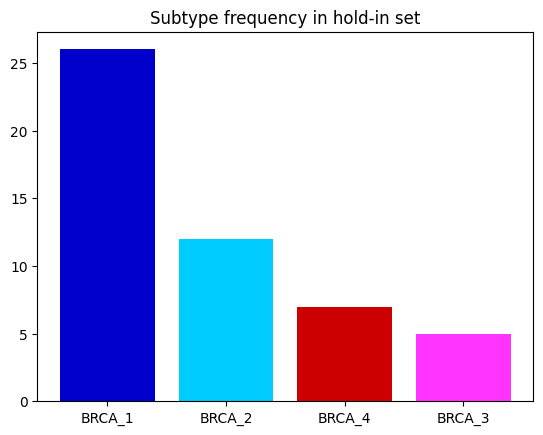

In [61]:
plt.bar(hold_in.Labels.value_counts().index,
        hold_in.Labels.value_counts(),
        color = c_list)
plt.title('Subtype frequency in hold-in set')
plt.savefig('i_o/val_0/subtype_hold-in_frequency.png')

In [15]:
hold_in.head(1)

,Labels,N:GEXP::ALB:213:,N:GEXP::TG:7038:,N:GEXP::COL1A1:1277:,N:GEXP::FN1:2335:,N:GEXP::KRT5:3852:,N:GEXP::KRT14:3861:,N:GEXP::KRT6A:3853:,N:GEXP::ADAM6:8755:,N:GEXP::SERPINA1:5265:,...,N:GEXP::C14orf1:11161:,N:GEXP::SMCHD1:23347:,N:GEXP::ARL2BP:23568:,N:GEXP::PITPNB:23760:,N:GEXP::KDM5A:5927:,N:GEXP::CNIH:10175:,N:GEXP::ACADS:35:,N:GEXP::YIPF2:78992:,N:GEXP::MEPCE:56257:,N:GEXP::PPARG:5468:
BRCA,,,,,,,,,,,,,,,,,,,,,
TCGA-AN-A0XO,BRCA_1,0.000031,0.017608,0.091709,0.160792,0.008369,0.007842,0.001442,0.001836,0.021493,...,0.196583,0.350352,0.235816,0.133461,0.242927,0.270648,0.042131,0.140885,0.215839,0.015242


In [16]:
hold_out.shape

(945, 5001)

### Hold-in input RF transfer to hold-out

In [72]:
repeats = 10

In [75]:
# Input transfer RF

    # Check raw vs F1 - raw_acc function imported

# config = 'hold-out'
# hld_out_frame = pd.DataFrame()
print('Start input transfer')
F1_scr_lst = []
raw_acc_lst = []
for r in list(range(0, repeats)): # pre-set
    if r == 10:
        print('Ten cross-folds complete')
    X_hold_in = hold_in.iloc[:, 1:] #         <----------- Train on hold-in
    y_hold_in = hold_in.iloc[:, 0]
    
    clf = RandomForestClassifier() # <--- reset classifier each time through loop
    clf.fit(X_hold_in, y_hold_in)
    # Done with training on the hold-in set
    # Now get X_test_hold_out and y_test_hold_out
    
    X_hold_out = hold_out.iloc[:, 1:] # <----- Test on hold-out
    y_hold_out = hold_out.iloc[:, 0]
    
    F1_scr = f1_score(y_hold_out, clf.predict(X_hold_out), average='weighted')
    raw_acc = accuracy_score(y_hold_out, clf.predict(X_hold_out))

    F1_scr_lst.append(F1_scr)
    raw_acc_lst.append(raw_acc)
                      
# hld_out_frame = pd.DataFrame(F1_output, columns = ['F1s'])
# hld_out_frame.insert(0, 'train_config', config)

print('Input transfer predictions complete')

Start input transfer
Input transfer predictions complete


In [76]:
F1_scr_lst

[0.7914951534886732,
 0.7893510454915654,
 0.7778798454220657,
 0.8223896021129666,
 0.7657223392106127,
 0.7982532811850614,
 0.7392367157677536,
 0.7474403525830393,
 0.75082501890789,
 0.7791721069939271]

In [77]:
raw_acc_lst

[0.798941798941799,
 0.7968253968253968,
 0.7873015873015873,
 0.8285714285714286,
 0.780952380952381,
 0.8105820105820106,
 0.7534391534391535,
 0.7597883597883598,
 0.7671957671957672,
 0.7904761904761904]

In [92]:
input_transfer_frame = pd.DataFrame({'F1_score':F1_scr_lst,
                                    'Raw_accuracy':raw_acc_lst})
# hld_out_frame.insert(0, 'train_config', config)

In [93]:
input_transfer_frame

,F1_score,Raw_accuracy
0,0.791495,0.798942
1,0.789351,0.796825
2,0.777880,0.787302
3,0.822390,0.828571
4,0.765722,0.780952
5,0.798253,0.810582
6,0.739237,0.753439
7,0.747440,0.759788
8,0.750825,0.767196
9,0.779172,0.790476


In [94]:
pwd

'/Users/karlberb/Documents/work/sample_count/synthetic_TCGA_data_gen/g_learning_curves'

In [97]:
ls i_o/val_0/

fit.TCGA_n_7014.epochs.20_pre_trained_on.NONE.epochs.NA_latent_dim.100_mad_5k_across_val_0.png
subtype_hold-in_frequency.png


In [99]:
run = 'r0'

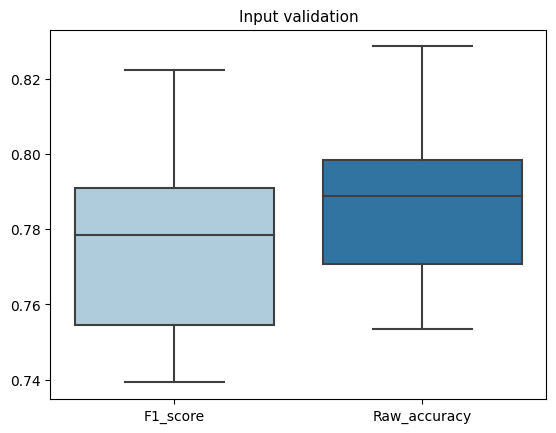

In [114]:
ax = sns.boxplot(input_transfer_frame, palette = [plt.cm.Paired(0), plt.cm.Paired(1)])
plt.title('Input validation', fontsize = 11)
plt.savefig(
    'i_o/val_0/input_val_'+run+'.png', bbox_inches = 'tight')

### Input F1 Main

In [ ]:
# Input variable summary
# hold-in, hold-out (fine_tune_file) # Hold-in has precedence over fine-tune
# pre_train_file (tall_stack)

In [ ]:
# Active learning, running average delta
# Label two splitting points on draw.io
    # Validation hold-out repeats 
    #

In [17]:
trn_tst_splts = 30

In [18]:
pwd

'/Users/karlberb/Documents/work/sample_count/synthetic_TCGA_data_gen/g_learning_curves'

In [ ]:
# Hold-out F1 to red box on quality plot
config = 'hold-out'
hld_out_frame = pd.DataFrame()
print('Starting a quality of embedding F1 object generation run')
F1_output = []

for r in list(range(0, trn_tst_splts)):
    if r == 10:
        print('ten')
    X = hold_out.iloc[:, 1:] #         <-----------   here, it sees object 'file'
    y = hold_out.iloc[:, 0]
    X_train, X_test, y_train, y_test = train_test_split(
                X, y,
                    test_size=0.33,
                        )
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)

    F1_scr = f1_score(y_test, clf.predict(X_test), average='weighted')
    F1_output.append(F1_scr)
hld_out_frame = pd.DataFrame(F1_output, columns = ['F1s'])
hld_out_frame.insert(0, 'train_config', config)

print('Input to VAE F1 object generated, send to concat with decoded objects')

In [ ]:
hld_out_frame.shape

In [ ]:
itr = 'bx_crv4'

In [ ]:
run = 'r02'

In [ ]:
# There are three places to take-off for the F1
# After the hold_in, after the pre-train, or after the fine-tune

In [ ]:
# Hold-in F1 to blue box on quality plot
config = 'hold-in'
hld_in_frame = pd.DataFrame()
print('Starting a quality of embedding F1 object generation run')
F1_output = []

for r in list(range(0, trn_tst_splts)):
    if r == 10:
        print('ten')
    X = hold_in.iloc[:, 1:] #         <-----------   here, it sees object 'hold-in' object
    y = hold_in.iloc[:, 0]
    X_train, X_test, y_train, y_test = train_test_split(
                X, y,
                    test_size=0.33,
                        )
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)

    F1_scr = f1_score(y_test, clf.predict(X_test), average='weighted')
    F1_output.append(F1_scr)
hld_in_frame = pd.DataFrame(F1_output, columns = ['F1s'])
hld_in_frame.insert(0, 'train_config', config)

print('Input to VAE F1 object generated, send to concat with decoded objects')

## VAE

### VAE Setup

In [19]:
# Function set for leave one out loop
def compute_latent(x): # x:
    mu, sigma = x
    batch = K.shape(mu)[0]
    dim = K.shape(mu)[1]
    eps = K.random_normal(shape=(batch,dim), mean=0., stddev=1.0 )
    return mu + K.exp(sigma/2)*eps

# Set custom layer , will need all this at start of shell script
class CustomVariationalLayer(Layer):
    """
    Define a custom layer
    """
    def __init__(self, **kwargs):
        self.is_placeholder = True
        super(CustomVariationalLayer, self).__init__(**kwargs)

    def vae_loss(self, x_input, x_decoded):
        reconstruction_loss = original_dim * metrics.binary_crossentropy(x_input, x_decoded)
        kl_loss = - 0.5 * K.sum(1 + z_log_var_encoded - K.square(z_mean_encoded) - 
                                K.exp(z_log_var_encoded), axis=-1)
        return K.mean(reconstruction_loss + (K.get_value(beta) * kl_loss))

    def call(self, inputs):
        x = inputs[0]
        x_decoded = inputs[1]
        loss = self.vae_loss(x, x_decoded)
        self.add_loss(loss, inputs=inputs)
        return x
    
class WarmUpCallback(Callback):
    def __init__(self, beta, kappa):
        self.beta = beta
        self.kappa = kappa

    def on_epoch_end(self, epoch, logs={}):
        if K.get_value(self.beta) <= 1:
            K.set_value(self.beta, K.get_value(self.beta) + self.kappa)

### Pre-train VAE

In [20]:
'TCGA_n_'+ str(len(pre_train_file))

'TCGA_n_7014'

In [21]:
'TCGA n = ' + str(len(pre_train_file))

'TCGA n = 7014'

In [22]:
itr = 'val_0'

In [23]:
itr

'val_0'

Instructions for updating:
Colocations handled automatically by placer.
Metal device set to: Apple M1 Max


2022-12-14 10:15:22.846474: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-14 10:15:22.846598: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-12-14 10:15:22.850812: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2022-12-14 10:15:22.854802: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-14 10:15:22.855435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-14 10:15:22.869888: I tensorflow/core/grappler/optimizers/custom_graph

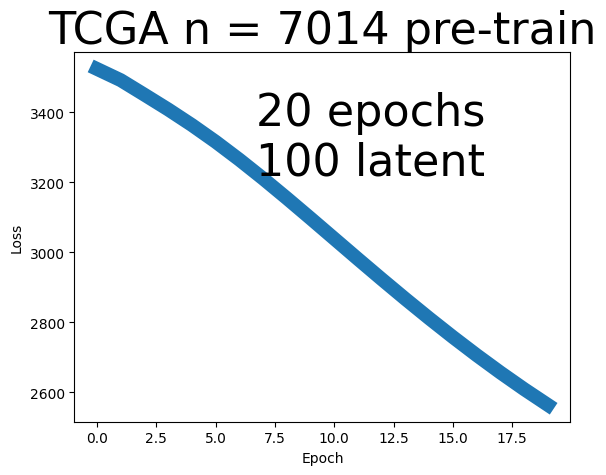

In [24]:
# Pre-train fitting with MAD 5k taken

train_file = hold_in
fit_on_plot_title = 'TCGA n = ' + str(len(pre_train_file))
fit_on_file_write = 'TCGA_n_'+ str(len(pre_train_file))
pre_trn = 'NONE'
feature_set = 'mad_5k_across'

fine_tune_epochs = 'NA'

features = train_file.columns[1:] # Now with pre-fit and fine-tune setup toggles

original_dim = len(features)
feature_dim = len(features)
latent_dim = 100               # Toggle here; to plot labels <--- Latent feature set diminsionality       *******

encoder_inputs = keras.Input(shape=(feature_dim,))
z_mean_dense_linear = layers.Dense(latent_dim, kernel_initializer='glorot_uniform', name="encoder_1")(encoder_inputs)
z_mean_dense_batchnorm = layers.BatchNormalization()(z_mean_dense_linear)
z_mean_encoded = layers.Activation('relu')(z_mean_dense_batchnorm)

z_log_var_dense_linear = layers.Dense(latent_dim, kernel_initializer='glorot_uniform', name="encoder_2")(encoder_inputs)
z_log_var_dense_batchnorm = layers.BatchNormalization()(z_log_var_dense_linear)
z_log_var_encoded = layers.Activation('relu')(z_log_var_dense_batchnorm)

latent_space = layers.Lambda(compute_latent, output_shape=(latent_dim,), name="latent_space")([z_mean_encoded, z_log_var_encoded])

decoder_to_reconstruct = layers.Dense(feature_dim, kernel_initializer='glorot_uniform', activation='sigmoid')
decoder_outputs = decoder_to_reconstruct(latent_space)

learning_rate = 0.0005
kappa = 1

beta = K.variable(0)

adam = optimizers.Adam(learning_rate=learning_rate)
vae_layer = CustomVariationalLayer()([encoder_inputs, decoder_outputs])
vae = Model(encoder_inputs, vae_layer)
vae.compile(optimizer=adam, loss=None, loss_weights=[beta]) # Take-off point from pre-training to fine-tuning

pre_train_epochs = 20 # Easy pre-train: 30, hard pre-train is 60

fit_start = time.time()
history = vae.fit(train_file.iloc[:, 1:],  #  fit the VAE on object, toggled in the setup
            epochs=pre_train_epochs, batch_size=50, shuffle=True,
            callbacks=[WarmUpCallback(beta, kappa)],
                 verbose=0 #  <---------------------- turn this on for production *************
                 )
fit_end = time.time() - fit_start

plt.plot(history.history['loss'],label="loss",linewidth = 10)

plt.title(fit_on_plot_title+' pre-train', fontsize = 32
         )

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.annotate(str(pre_train_epochs)+' epochs'+
             '\n'+str(latent_dim)+' latent',
            xy = (.4, .8), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize = 32
            )

# plt.legend(loc="lower left")
plt.savefig(
    'i_o/'+itr+'/fit.'+fit_on_file_write+'.epochs.'+str(pre_train_epochs)+
    '_pre_trained_on.'+pre_trn+'.epochs.'+fine_tune_epochs+
    '_latent_dim.'+str(latent_dim)+'_'+ # Do not change latent dim in the middle of transfer training
    # '_pltv-'+str(plt_v)+
    # 'fitting_epochs.'+str(epochs)+'_'+
    feature_set+'_'+itr+
    '.png', bbox_inches='tight')

/Users/karlberb/miniforge3/envs/tf_M1_py3dot9/lib/python3.9/site-packages/keras/engine/training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2022-12-13 15:43:13.300736: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-13 15:43:13.385414: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Fine tuning with mad_5k_across feature set experiment done


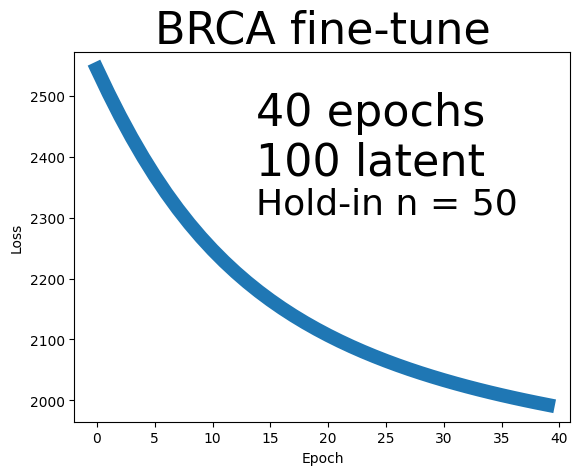

In [21]:
# Fine-tuning
# pretrain epochs variable in memory from above, latent dim also set already at this point

train_file = hold_in
pre_trn = fit_on_file_write
fit_on = hold_in.index.name

fine_tune_epochs = 40 # Overwrite 'NA' for this variable, from above; fine-tuning easy: 100, hard: 200

fit_start = time.time()
history = vae.fit(train_file.iloc[:, 1:],  #  fit the VAE on object, toggled in the setup
            epochs = fine_tune_epochs, batch_size=50, shuffle=True,
            callbacks = [WarmUpCallback(beta, kappa)],
                 verbose=0 #  <---------------------- turn this on for production *************
                 )

fit_end = time.time() - fit_start

plt.plot(history.history['loss'],label="loss",linewidth = 10)

plt.title(fit_on+' fine-tune', fontsize = 32
         )

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.annotate(str(fine_tune_epochs)+' epochs'+
            '\n'+str(latent_dim)+' latent',       
            xy = (.4, .8), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize = 32
            )
plt.annotate('Hold-in n = '+str(hold_in.shape[0]),             
            xy = (.4, .6), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize = 26
            )

# plt.legend(loc="lower left")
plt.savefig(
    'i_o/'+itr+'/fit.'+fit_on+'.epochs.'+str(fine_tune_epochs)+
    '_pre_trained_on.'+pre_trn+'.epochs.'+str(pre_train_epochs)+
    '_latent_dim.'+str(latent_dim)+'_'+ # Do not change latent dim in the middle of transfer training
    # '_pltv-'+str(plt_v)+
    # 'fitting_epochs.'+str(epochs)+'_'+
    feature_set+'_'+itr+
    '.png', bbox_inches='tight') # version 18, norm within cohort
# plt.close()

encoder = Model(encoder_inputs, z_mean_encoded)
decoder_input = keras.Input(shape = (latent_dim, ))
_x_decoded_mean = decoder_to_reconstruct(decoder_input)
decoder = Model(decoder_input, _x_decoded_mean)

y_df = train_file.Labels

decoded = pd.DataFrame(decoder.predict(encoder.predict(train_file.iloc[:, 1:])),
                       index = train_file.index, columns = train_file.iloc[:, 1:].columns)

latent_object = pd.DataFrame(encoder.predict(train_file.iloc[:, 1:]),
             index=train_file.index,
                # columns=decode_df.iloc[:, 1:].columns # Columns are different because this is latent space
        )
latent_object.index.name = hold_in.index.name
latent_object = pd.concat( [pd.DataFrame(y_df), latent_object] , axis =1)
latent_object.to_csv(
    'i_o/'+itr+'/fit.'+fit_on+'.epochs.'+str(fine_tune_epochs)+
    '_pre_trained_on.'+pre_trn+'.epochs.'+str(pre_train_epochs)+
    '_latent_object_latent_dim.'+str(latent_dim)+
    '_'+feature_set+'_'+itr+
    '.tsv',
    sep = '\t')
# break
decoded_labeled = pd.concat( [pd.DataFrame(y_df), decoded] , axis =1)
decoded_labeled.to_csv(
    'i_o/'+itr+'/fit.'+fit_on+'.epochs.'+str(fine_tune_epochs)+
    '_pre_trained_on.'+pre_trn+'.epochs.'+str(pre_train_epochs)+
    '_decoded_obj_latent_dim.'+str(latent_dim)+
    '_'+feature_set+'_'+itr+
    '.tsv',
    sep = '\t')

print('Fine tuning with '+feature_set+' feature set experiment done')

In [ ]:
# Qaulity of encoding section, continued 
# feature set / classical ML / VAE transfer fitting protocol
# read results written from
# this section for F1 plot
# then repeat for the other cancers

# latent feature sampling method, benchmark with mutation version
    # Pick number, if not zero, mutate
    # " " " pick from uniform distribution

# run same hold-in turn down on BLCA then do the full-TCGA pre-train (?)

## Read decoded files for F1s, quality of encoding plots 

In [22]:
ls i_o/bx_crv4/

fit.BRCA.epochs.40_pre_trained_on.TCGA_n_7014.epochs.10_decoded_obj_latent_dim.100_mad_5k_across_bx_crv4.tsv
fit.BRCA.epochs.40_pre_trained_on.TCGA_n_7014.epochs.10_latent_dim.100_mad_5k_across_bx_crv4.png
fit.BRCA.epochs.40_pre_trained_on.TCGA_n_7014.epochs.10_latent_object_latent_dim.100_mad_5k_across_bx_crv4.tsv
fit.BRCA.epochs.40_pre_trained_on.TCGA_n_7014.epochs.20_decoded_obj_latent_dim.100_mad_5k_across_bx_crv4.tsv
fit.BRCA.epochs.40_pre_trained_on.TCGA_n_7014.epochs.20_latent_dim.100_mad_5k_across_bx_crv4.png
fit.BRCA.epochs.40_pre_trained_on.TCGA_n_7014.epochs.20_latent_object_latent_dim.100_mad_5k_across_bx_crv4.tsv
fit.BRCA.epochs.60_pre_trained_on.TCGA_n_7014.epochs.10_decoded_obj_latent_dim.100_mad_5k_across_bx_crv4.tsv
fit.BRCA.epochs.60_pre_trained_on.TCGA_n_7014.epochs.10_latent_dim.100_mad_5k_across_bx_crv4.png
fit.BRCA.epochs.60_pre_trained_on.TCGA_n_7014.epochs.10_latent_object_latent_dim.100_mad_5k_across_bx_crv4.tsv
fit.BRCA.epochs.60_pre_trained_on.TCGA_n_7014.epo

In [23]:
dec_pths = sorted(glob.glob('i_o/bx_crv4/fit.BRCA*decoded*.tsv'))

### Blend (?)

In [ ]:
two_pths = [
 'i_o/bx_crv/fit.BRCA.epochs.70_pre_trained_on.TCGA_n_25.epochs.15_decoded_obj_latent_dim.100_mad_5k_across_itr1.tsv',
 'i_o/bx_crv/fit.BRCA.epochs.80_pre_trained_on.TCGA_n_25.epochs.15_decoded_obj_latent_dim.100_mad_5k_across_itr1.tsv']

In [24]:
dec_pths

['i_o/bx_crv4/fit.BRCA.epochs.40_pre_trained_on.TCGA_n_7014.epochs.10_decoded_obj_latent_dim.100_mad_5k_across_bx_crv4.tsv',
 'i_o/bx_crv4/fit.BRCA.epochs.40_pre_trained_on.TCGA_n_7014.epochs.20_decoded_obj_latent_dim.100_mad_5k_across_bx_crv4.tsv',
 'i_o/bx_crv4/fit.BRCA.epochs.60_pre_trained_on.TCGA_n_7014.epochs.10_decoded_obj_latent_dim.100_mad_5k_across_bx_crv4.tsv',
 'i_o/bx_crv4/fit.BRCA.epochs.60_pre_trained_on.TCGA_n_7014.epochs.20_decoded_obj_latent_dim.100_mad_5k_across_bx_crv4.tsv']

In [30]:
for pth in dec_pths:
    print(pth)

i_o/bx_crv3/fit.BRCA.epochs.100_pre_trained_on.TCGA_n_7014.epochs.15_decoded_obj_latent_dim.100_mad_5k_across_bx_crv3.tsv
i_o/bx_crv3/fit.BRCA.epochs.100_pre_trained_on.TCGA_n_7014.epochs.20_decoded_obj_latent_dim.100_mad_5k_across_bx_crv3.tsv
i_o/bx_crv3/fit.BRCA.epochs.80_pre_trained_on.TCGA_n_7014.epochs.15_decoded_obj_latent_dim.100_mad_5k_across_bx_crv3.tsv
i_o/bx_crv3/fit.BRCA.epochs.80_pre_trained_on.TCGA_n_7014.epochs.20_decoded_obj_latent_dim.100_mad_5k_across_bx_crv3.tsv


In [31]:
pth.split('_')

['i',
 'o/bx',
 'crv3/fit.BRCA.epochs.80',
 'pre',
 'trained',
 'on.TCGA',
 'n',
 '7014.epochs.20',
 'decoded',
 'obj',
 'latent',
 'dim.100',
 'mad',
 '5k',
 'across',
 'bx',
 'crv3.tsv']

In [47]:
pth.split('_')[2].split('.')[3]

'80'

In [48]:
pth.split('_')[7].split('.')[2]+'_'+pth.split('_')[2].split('.')[3]

'15_80'

In [49]:
(pth.split('_')[2].split('/')[1]+'_'+
pth.split('_')[3]+'_'+pth.split('_')[4]+'_'+pth.split('_')[5]+'_'+
pth.split('_')[-7]+'_'+pth.split('_')[-6])

'fit.BRCA.epochs.80_pre_trained_on.TCGA_latent_dim.100'

In [32]:
trn_tst_splts

100

In [25]:
# This takes decoded paths

fig_stack = pd.DataFrame()
for pth in dec_pths:
    config = pth.split('_')[7].split('.')[2]+'_'+pth.split('_')[2].split('.')[3]
    # break
    dec = pd.read_csv(pth, sep = '\t', index_col = 0)

    print('Starting a quality of embedding F1 object generation run')
    # Need to track the loss plots off the back-end

    F1_output = []
    for r in list(range(0, trn_tst_splts)):
        
        X = dec.iloc[:, 1:]
        y = dec.iloc[:, 0]
        X_train, X_test, y_train, y_test = train_test_split(
                X, y,
                    test_size=0.33,
                        )
        clf = RandomForestClassifier()
        clf.fit(X_train, y_train)

        F1_scr = f1_score(y_test, clf.predict(X_test), average='weighted')
        F1_output.append(F1_scr)

    loop_frame = pd.DataFrame(F1_output, columns = ['F1s'])
    loop_frame.insert(0, 'train_config', config)
    fig_stack = pd.concat([fig_stack, loop_frame], axis = 0)
    # break
print('Learning curve objects generated, send to concat with input')

Starting a quality of embedding F1 object generation run
Starting a quality of embedding F1 object generation run
Starting a quality of embedding F1 object generation run
Starting a quality of embedding F1 object generation run
Learning curve objects generated, send to concat with input


In [26]:
blend_stack = fig_stack[fig_stack.train_config.str.contains('10')].copy()

In [27]:
blend_stack.train_config = 'blend' # Qaulity of embedding, learning curve input frames not matching

In [28]:
full_stack = pd.concat(
    [hld_out_frame, hld_in_frame, fig_stack], axis = 0)

##### Color section

In [108]:
sns.color_palette("hls", 10)[2]

(0.7247999999999999, 0.86, 0.33999999999999997)

In [109]:
pal = sns.color_palette()

In [112]:
print(pal)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (1.0, 0.4980392156862745, 0.054901960784313725), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), (0.5803921568627451, 0.403921568627451, 0.7411764705882353), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902), (0.4980392156862745, 0.4980392156862745, 0.4980392156862745), (0.7372549019607844, 0.7411764705882353, 0.13333333333333333), (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]


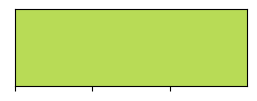

In [113]:
sns.palplot(sns.color_palette("hls", 10)[2])

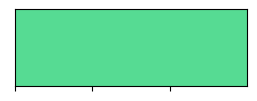

In [114]:
sns.palplot(sns.color_palette("hls", 10)[4])

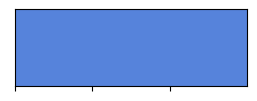

In [115]:
sns.palplot(sns.color_palette("hls", 10)[6])

In [124]:
sns.color_palette("hls", 10)[6]

(0.33999999999999997, 0.5167999999999995, 0.86)

##### Quality of embedding plot

In [57]:
full_stack

,train_config,F1s
0,hold-out,0.780673
1,hold-out,0.828093
2,hold-out,0.855923
3,hold-out,0.820381
4,hold-out,0.875573
...,...,...
55,15_80,0.875777
56,15_80,0.906809
57,15_80,0.803039
58,15_80,0.852380


In [153]:
full_stack.train_config.unique()

array(['hold-out', 'hold-in', '12_70', '15_70', '12_80', '15_80'],
      dtype=object)

In [150]:
Target out:
inpt_dec_figures - pointed, check

##### Quality of embedding plot template

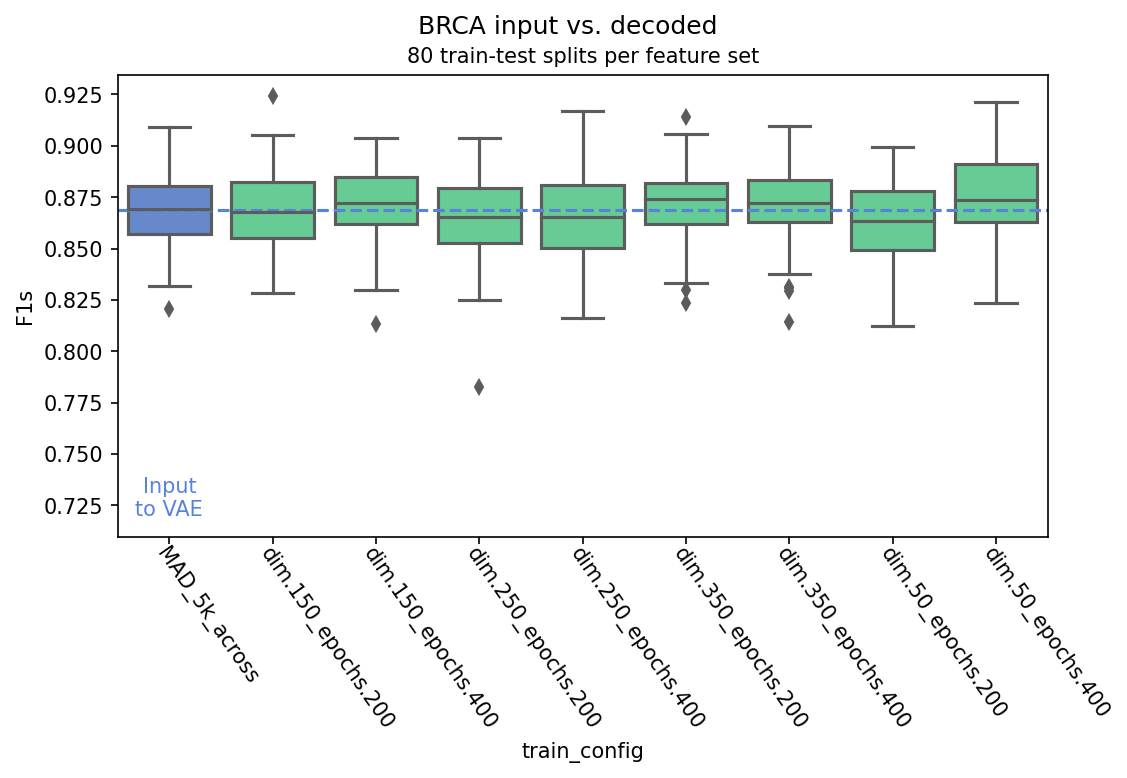

In [155]:
v_scale = .72
low_dim = '50'
high_dim = '350'
my_pal = {'MAD_5k_across': sns.color_palette("hls", 10)[6],
          'dim.150_epochs.200': sns.color_palette("hls", 10)[4],
          'dim.150_epochs.400': sns.color_palette("hls", 10)[4],
          'dim.250_epochs.200': sns.color_palette("hls", 10)[4],
          'dim.250_epochs.400': sns.color_palette("hls", 10)[4],
          'dim.350_epochs.200': sns.color_palette("hls", 10)[4],
          'dim.350_epochs.400': sns.color_palette("hls", 10)[4],
          'dim.50_epochs.200': sns.color_palette("hls", 10)[4],
          'dim.50_epochs.400': sns.color_palette("hls", 10)[4]}
figure(figsize=(8, 4), dpi=150)
ax = sns.boxplot(full_stack, x='train_config', y='F1s',
           palette = my_pal)
ax.set_xticklabels(ax.get_xticklabels(),rotation=-55,
                   ha='left',
                   rotation_mode='anchor'
                  )
rcParams['xtick.major.pad']='.01'
# ax2 = ax.twinx()
plt.plot(.5, v_scale, color = 'white')
plt.plot([-.5,8.5], [inpt_frame.F1s.mean(),
                 inpt_frame.F1s.mean()], linestyle='dashed',
        color = sns.color_palette("hls", 10)[6])

plt.suptitle(file.index.name+' input vs. decoded')
plt.title(str(trn_tst_splts)+' train-test splits per feature set',
         fontsize = 10)
plt.annotate('Input\nto VAE', (-.0,v_scale),
             # fontsize = 15,
             ha = 'center',
            color = sns.color_palette("hls", 10)[6])          # blue
plt.annotate('Decoded', (.2,.1), fontsize = 15) 
plt.savefig('i_o/box_curve/inpt_dec_figures/BRCA_dim.'+low_dim+'-'+high_dim+'.png', dpi = 150, # < 
           bbox_inches = 'tight')

##### Transfer training devel

In [107]:
pwd

'/Users/karlberb/Documents/work/sample_count/synthetic_TCGA_data_gen/g_learning_curves'

In [108]:
mkdir i_o/bx_crv/quality_encode

In [163]:
sns.color_palette("hls", 10)

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.6832, 0.33999999999999997),
 (0.7247999999999999, 0.86, 0.33999999999999997),
 (0.41279999999999994, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5792000000000002),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.5167999999999995, 0.86),
 (0.4752000000000003, 0.33999999999999997, 0.86),
 (0.7871999999999999, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6207999999999999)]

In [155]:
sns.color_palette("hls", 10)[0]

(0.86, 0.3712, 0.33999999999999997)

In [29]:
tune_stack = pd.concat( [full_stack, blend_stack] , axis = 0)

In [30]:
tune_stack.train_config.unique()

array(['hold-out', 'hold-in', '10_40', '20_40', '10_60', '20_60', 'blend'],
      dtype=object)

In [31]:
run

'r02'

### Quality of encoding plot

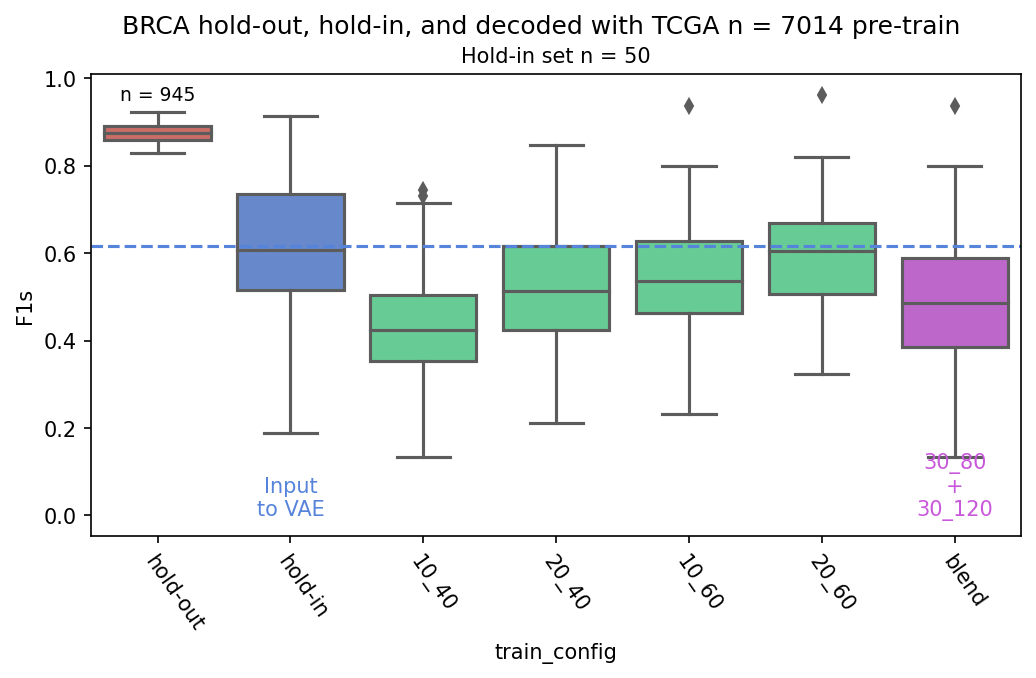

In [32]:
v_scale = 0 # .34

my_pal = {'hold-out': sns.color_palette("hls", 10)[0],
          'hold-in': sns.color_palette("hls", 10)[6],
          '10_40': sns.color_palette("hls", 10)[4],
          '20_40': sns.color_palette("hls", 10)[4],
          '10_60': sns.color_palette("hls", 10)[4],
          '20_60': sns.color_palette("hls", 10)[4],
          'blend': sns.color_palette("hls", 10)[8]}

figure(figsize=(8, 4), dpi=150)
ax = sns.boxplot(tune_stack, x='train_config', y='F1s',
           palette = my_pal)
ax.set_xticklabels(ax.get_xticklabels(),rotation=-55,
                   ha='left',
                   rotation_mode='anchor'
                  )
rcParams['xtick.major.pad']='.01'
# ax2 = ax.twinx()
plt.plot(.5, v_scale, color = 'white')
plt.plot([-.5,6.5], [hld_in_frame.F1s.mean(),
                 hld_in_frame.F1s.mean()], linestyle='dashed',
        color = sns.color_palette("hls", 10)[6])

plt.suptitle(fine_tune_file.index.name+' hold-out, hold-in, and decoded with TCGA n = '+str(len(pre_train_file))+' pre-train')
plt.title('Hold-in set n = '+str(len(hold_in)),
         fontsize = 10)
plt.annotate('Input\nto VAE', (1,v_scale),
             # fontsize = 15,
             ha = 'center',
            color = sns.color_palette("hls", 10)[6])          # blue
plt.annotate('30_80\n+\n30_120', (6,v_scale),
             # fontsize = 15,
             ha = 'center',
            color = sns.color_palette("hls", 10)[8])          # blue
plt.annotate('n = '+str(len(hold_out)), (0, .95), fontsize = 9, ha = 'center') 
plt.savefig('i_o/'+itr+'/quality_encode/BRCA.fine_TCGA.pre_'+run+'.png', dpi = 150, # < 
           bbox_inches = 'tight')

##### Hold-in devel

In [70]:
hold_in.Labels.value_counts()

BRCA_1    16
BRCA_2    11
BRCA_3    10
BRCA_4     3
Name: Labels, dtype: int64

In [71]:
hold_in = file.sample(40)
hold_out = file.loc[file[~file.index.isin(hold_in.index)].index, :]

In [ ]:
sub_samp_drug_sub[~sub_samp_drug_sub.Cell_line.isin(X.Cell_line)].Cell_line

### Hold-out box curve F1 gen to hue frame

In [45]:
hold_out.shape

(895, 5001)

In [33]:
print('Hold out box curve F1')

hld_out_bx_crv = pd.DataFrame()
for smp_sz in list(range(10, 151, 10)): # BRCA <--- across run, plot up to 100?
    step_frame = pd.DataFrame()
    print(smp_sz)
    RF_output = []
    resmpl_count = 100
    for r in list(range(0, resmpl_count)):
        
        labeled_sample_subset_frame = hold_out.sample(smp_sz)
        X = labeled_sample_subset_frame.iloc[:, 1:]
        y = labeled_sample_subset_frame.iloc[:, 0]
        X_train, X_test, y_train, y_test = train_test_split(
                    X, y,
                        test_size=0.33,
                            )
        RF_clf = RandomForestClassifier(max_depth=2)
        RF_clf.fit(X_train, y_train)

        RF_F1_scr = f1_score(y_test, RF_clf.predict(X_test), average='weighted')
        RF_output.append(RF_F1_scr)

#     inpt_RF_F1_means[smp_sz] = round(mean(RF_output), 3)
    
#     inpt_RF_F1_dct[smp_sz] = RF_output
    # break
    step_frame['data_phase'] = ['hold-out'] * resmpl_count
    step_frame['step_size'] = [smp_sz] * resmpl_count
    step_frame['F1_score'] = RF_output
    hld_out_bx_crv = pd.concat( [hld_out_bx_crv, step_frame] , axis = 0)    
print('hold out curve done')

Hold out box curve F1
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
hold out curve done


In [ ]:
hld_out_bx_crv

### Hold-in box curve F1 gen to hue frame

In [47]:
hold_in.shape

(100, 5001)

In [34]:
print('Hold _in box curve F1')

hld_in_bx_crv = pd.DataFrame()
for smp_sz in list(range(10, 151, 10)): # BRCA <--- across run, plot up to 100?
    step_frame = pd.DataFrame()
    print(smp_sz)
    RF_output = []
    # resmpl_count = 60
    for r in list(range(0, resmpl_count)):
        
        labeled_sample_subset_frame = hold_in.sample(smp_sz) # <--- check
        X = labeled_sample_subset_frame.iloc[:, 1:]
        y = labeled_sample_subset_frame.iloc[:, 0]
        X_train, X_test, y_train, y_test = train_test_split(
                    X, y,
                        test_size=0.33,
                            )
        RF_clf = RandomForestClassifier(max_depth=2)
        RF_clf.fit(X_train, y_train)

        RF_F1_scr = f1_score(y_test, RF_clf.predict(X_test), average='weighted')
        RF_output.append(RF_F1_scr)

    step_frame['data_phase'] = ['hold-in'] * resmpl_count
    step_frame['step_size'] = [smp_sz] * resmpl_count
    step_frame['F1_score'] = RF_output
    hld_in_bx_crv = pd.concat( [hld_in_bx_crv, step_frame] , axis = 0)    
print('Hold generated, send to plot function')

Hold _in box curve F1
10
20
30
40
50
60


ValueError: Cannot take a larger sample than population when 'replace=False'

In [49]:
hld_in_bx_crv.shape

(1000, 3)

In [50]:
hld_in_bx_crv.head(1)

,data_phase,step_size,F1_score
0,hold-in,10,0.1


#### Decoded box curve

In [ ]:
blend_stack

In [35]:
ls i_o/bx_crv4/

fit.BRCA.epochs.40_pre_trained_on.TCGA_n_7014.epochs.10_decoded_obj_latent_dim.100_mad_5k_across_bx_crv4.tsv
fit.BRCA.epochs.40_pre_trained_on.TCGA_n_7014.epochs.10_latent_dim.100_mad_5k_across_bx_crv4.png
fit.BRCA.epochs.40_pre_trained_on.TCGA_n_7014.epochs.10_latent_object_latent_dim.100_mad_5k_across_bx_crv4.tsv
fit.BRCA.epochs.40_pre_trained_on.TCGA_n_7014.epochs.20_decoded_obj_latent_dim.100_mad_5k_across_bx_crv4.tsv
fit.BRCA.epochs.40_pre_trained_on.TCGA_n_7014.epochs.20_latent_dim.100_mad_5k_across_bx_crv4.png
fit.BRCA.epochs.40_pre_trained_on.TCGA_n_7014.epochs.20_latent_object_latent_dim.100_mad_5k_across_bx_crv4.tsv
fit.BRCA.epochs.60_pre_trained_on.TCGA_n_7014.epochs.10_decoded_obj_latent_dim.100_mad_5k_across_bx_crv4.tsv
fit.BRCA.epochs.60_pre_trained_on.TCGA_n_7014.epochs.10_latent_dim.100_mad_5k_across_bx_crv4.png
fit.BRCA.epochs.60_pre_trained_on.TCGA_n_7014.epochs.10_latent_object_latent_dim.100_mad_5k_across_bx_crv4.tsv
fit.BRCA.epochs.60_pre_trained_on.TCGA_n_7014.epo

In [36]:
df_to_clf = pd.read_csv(
    'i_o/bx_crv4/fit.BRCA.epochs.60_pre_trained_on.TCGA_n_7014.epochs.20_decoded_obj_latent_dim.100_mad_5k_across_bx_crv4.tsv',
    sep = '\t', index_col = 0)

In [37]:
# Learning curve on decoded) samples build

dec_RF_F1_frame = pd.DataFrame()

for smp_sz in list(range(10, 151, 10)): # BRCA <--- across run, mirror input steps above
    step_frame = pd.DataFrame()
    print(smp_sz)

    RF_output = []
    for r in list(range(0, resmpl_count)):
        
        labeled_sample_subset_frame = df_to_clf.sample(smp_sz) # df_to_clf set as decoded object now, not the input
        X = labeled_sample_subset_frame.iloc[:, 1:]
        y = labeled_sample_subset_frame.iloc[:, 0]
        X_train, X_test, y_train, y_test = train_test_split(
                    X, y,
                        test_size=0.33,
                            )
        RF_clf = RandomForestClassifier(max_depth=2)
        RF_clf.fit(X_train, y_train)

        RF_F1_scr = f1_score(y_test, RF_clf.predict(X_test), average='weighted')
        RF_output.append(RF_F1_scr)
           
    
    step_frame['data_phase'] = ['decoded'] * resmpl_count
    step_frame['step_size'] = [smp_sz] * resmpl_count
    step_frame['F1_score'] = RF_output
    dec_RF_F1_frame = pd.concat( [dec_RF_F1_frame, step_frame] , axis = 0)    
    
print('decoded box curve frame done')

10
20
30
40
50
60


ValueError: Cannot take a larger sample than population when 'replace=False'

### Synth learning curve  

In [38]:
latent_obj = pd.read_csv(
    'i_o/bx_crv4/fit.BRCA.epochs.60_pre_trained_on.TCGA_n_7014.epochs.20_latent_object_latent_dim.100_mad_5k_across_bx_crv4.tsv',
    sep = '\t', index_col = 0)

In [ ]:
# Friday, 3:30 pm, want to balance the sample counts within each subtype
# Find the threshold at which to drop or keep under-sampled subtypes: Deliverable
# Also, going to toggle-off F1 per no imbalance now

In [ ]:
# idea for new notebook name: Digital cousin

In [74]:
sorted(latent_obj.Labels.unique())

['BRCA_1', 'BRCA_2', 'BRCA_3', 'BRCA_4']

##### Synth main

In [46]:
synth_ndx_strt = 0
up_or_down = [1, -1]

# synth_full_frame05 = pd.DataFrame()
# synth_full_frame10 = pd.DataFrame()
synth_full_frame = pd.DataFrame()

for subtype in sorted(latent_obj.Labels.unique()): # Subset the latent feature frame on each subtype
    
    print(subtype)
    
    sub = latent_obj[latent_obj.Labels == subtype]
    synth_lat_feat_vec = []
    
    sub_len = len(sub)
    synth_sub_len = len(sub)*3  # <------ Toggle the integer at the end of this line to amplify the sample size
    
    synth_index = ['SYNTH-' + fine_tune_file.index.name + '-' + jtem for jtem in [str(
        item).zfill(5) for item in list(range(synth_ndx_strt,
                                              synth_sub_len + synth_ndx_strt))]]
    
    synth_sub_frame = pd.DataFrame(index = synth_index)
    synth_sub_frame.insert(0, 'Labels', sub.Labels[0])

    for lat_feat in sub.columns[1:]:               # Go through the subtype latent feature set,
        lat_col = sub.loc[:, lat_feat]

        rand_lat_feat_vals = lat_col.sample(
            synth_sub_len, replace = True)
        new_vals = []
        for val in rand_lat_feat_vals:
            new_vals.append(val+rand_lat_feat_vals.mean()*.05*sample(up_or_down,1)[0]) # Fuzz
        fuzzed = pd.Series(new_vals, index = synth_index)
        synth_sub_frame = pd.concat(
            [synth_sub_frame, fuzzed], axis = 1)
        
    synth_full_frame = pd.concat(
        [synth_full_frame, synth_sub_frame], axis = 0)
    
    synth_ndx_strt = synth_ndx_strt + synth_sub_len

BRCA_1
BRCA_2
BRCA_3
BRCA_4


#### Synth devel

In [227]:
new_vals = []
for val in rand_lat_feat_vals:
    # print(val)
    new_vals.append(val+rand_lat_feat_vals.mean()*.05*sample(up_or_down,1)[0])
    # break
    
fuzzed = pd.Series(new_vals, index = synth_index)

<AxesSubplot: >

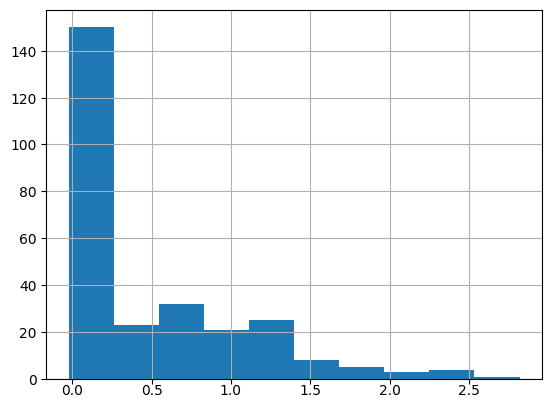

In [228]:
fuzzed.hist()

In [220]:
rand_lat_feat_vals.mean()

0.46026550940441174

In [221]:
type(rand_lat_feat_vals)

pandas.core.series.Series

In [216]:
rand_lat_feat_vals

BRCA
TCGA-BH-A0BA    1.381983
TCGA-A7-A3RF    0.000000
TCGA-PL-A8LX    0.000000
TCGA-A8-A07J    0.669237
TCGA-A8-A06U    1.334681
                  ...   
TCGA-GM-A3NW    0.087688
TCGA-E2-A1IL    0.766139
TCGA-AC-A3EH    0.000000
TCGA-EW-A2FS    0.000000
TCGA-EW-A1P3    0.000000
Name: 0, Length: 272, dtype: float64

In [198]:
up_or_down = [1, -1]

In [213]:
sign = sample(up_or_down,1)[0]
sign

-1

In [205]:
lat_col.mean()

0.5087377233602941

<AxesSubplot: >

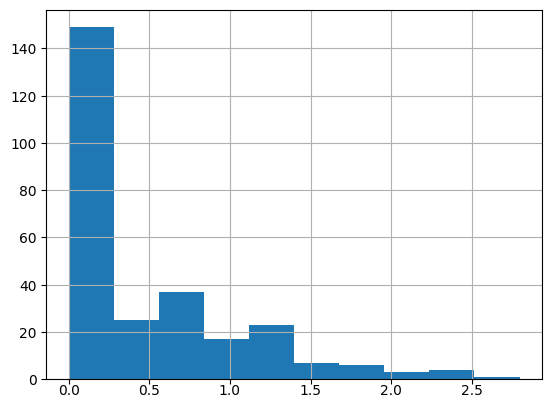

In [217]:
rand_lat_feat_vals.hist()

<AxesSubplot: >

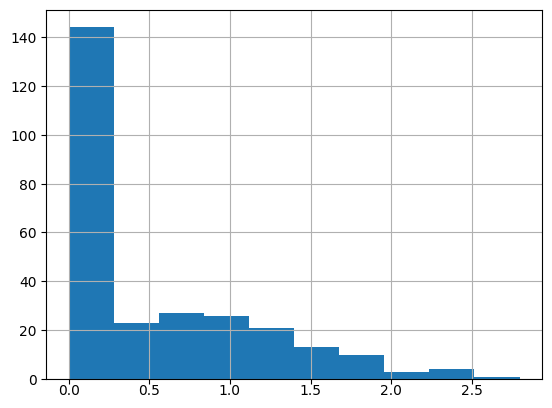

In [206]:
lat_col.hist()

In [145]:
synth_full_frame.shape  # hold in samples vs. 100 dim latent space

(40, 101)

In [47]:
# Trained decoder still in memory (usually about 5GB at this point)
synth_decoded = pd.DataFrame(decoder.predict( # note:
    synth_full_frame.iloc[:, 1:]),
        index=synth_full_frame.index, # Putting on synthetic index
            columns=hold_in.iloc[:, 1:].columns) # Putting on og columns

In [48]:
synth_decoded_labeled = pd.concat(
    [pd.DataFrame(synth_full_frame.Labels),
     synth_decoded] , axis =1)

In [49]:
df_to_clf = synth_decoded_labeled

In [80]:
# 05 an 10 percent fuzz toggle
synth_decoded = pd.DataFrame(decoder.predict(
    synth_full_frame05.iloc[:, 1:]),
        index=synth_full_frame.index,
            columns=hold_in.iloc[:, 1:].columns)
synth_decoded_labeled = pd.concat(
    [pd.DataFrame(synth_full_frame.Labels),
     synth_decoded] , axis =1)
df_to_clf = synth_decoded_labeled

ValueError: Shape of passed values is (38, 5000), indices imply (0, 5000)

##### Synth F1

In [44]:
smp_sz

110

In [45]:
synth_full_frame

,Labels,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SYNTH-BRCA-00000,BRCA_1,0.225564,0.281646,0.001935,0.015813,0.526976,0.464221,0.223615,0.552765,0.049718,...,0.815883,0.006519,0.089208,0.000777,0.220017,0.299029,0.518156,0.203315,1.094813,0.006644
SYNTH-BRCA-00001,BRCA_1,0.655348,0.629770,-0.001935,-0.015813,0.015845,-0.013738,0.108580,1.090222,0.048283,...,-0.006970,0.606905,1.691756,-0.000777,0.009497,0.557246,0.672525,0.281862,1.008585,0.302886
SYNTH-BRCA-00002,BRCA_1,0.511011,0.013248,-0.001935,0.408692,0.526976,-0.013738,0.243240,-0.017390,0.021439,...,0.503820,0.006519,1.213610,0.000777,0.249765,0.439101,0.581948,0.384356,1.075425,0.006644
SYNTH-BRCA-00003,BRCA_1,-0.018059,-0.013248,0.079866,0.539213,0.015845,0.212720,-0.016301,-0.017390,0.000718,...,0.006970,0.006519,0.029571,0.000777,0.054575,0.415167,0.651964,0.349432,1.008585,0.006644
SYNTH-BRCA-00004,BRCA_1,0.352220,0.080307,0.001935,0.015813,0.025306,0.338349,0.691053,0.701724,-0.000718,...,-0.006970,0.006519,0.940270,-0.000777,0.245093,0.775409,0.847134,0.349432,1.012287,0.206116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SYNTH-BRCA-00095,BRCA_4,0.351293,-0.004015,0.000000,0.487052,0.081199,0.000000,0.000977,-0.008644,-0.003794,...,-0.022604,0.000000,-0.028812,0.000774,0.000000,0.479959,0.004937,0.004988,0.424940,0.001202
SYNTH-BRCA-00096,BRCA_4,0.009077,0.004015,0.000000,0.557110,0.396230,0.000000,0.000977,0.496101,0.003794,...,0.022604,0.000000,0.568415,-0.000774,0.000000,0.003404,-0.004937,0.004988,0.588658,0.001202
SYNTH-BRCA-00097,BRCA_4,0.494406,0.088355,0.000000,0.563738,-0.005810,0.000000,0.000977,0.461735,0.074674,...,0.600985,0.000000,0.028812,-0.000774,0.000000,0.003404,0.004937,0.552103,0.009309,-0.001202
SYNTH-BRCA-00098,BRCA_4,0.009077,-0.004015,0.000000,-0.020087,0.005810,0.000000,-0.000977,0.513390,0.125885,...,0.338027,0.000000,0.996478,-0.000774,0.000000,0.473151,0.004937,-0.004988,0.009309,-0.001202


In [50]:
# Two degrees of noise - fail

# synth_05 = pd.DataFrame()
# synth_10 = pd.DataFrame()
synth = pd.DataFrame()

for smp_sz in list(range(10, 151, 10)): # BRCA <--- across run, mirror input steps above
    step_frame = pd.DataFrame()
    print(smp_sz)

    RF_output = []
    
    for r in list(range(0, resmpl_count)):
        
        labeled_sample_subset_frame = df_to_clf.sample(smp_sz) # df_to_clf set as decoded object now, not the input
        X = labeled_sample_subset_frame.iloc[:, 1:]
        y = labeled_sample_subset_frame.iloc[:, 0]
        X_train, X_test, y_train, y_test = train_test_split(
                    X, y,
                        test_size=0.33,
                            )
        RF_clf = RandomForestClassifier(max_depth=2)
        RF_clf.fit(X_train, y_train)

        RF_F1_scr = f1_score(y_test, RF_clf.predict(X_test), average='weighted')
        RF_output.append(RF_F1_scr)
        # break
    # break
    # synth_RF_F1_means[smp_sz] = round(mean(RF_output), 3)
    step_frame['data_phase'] = ['synth'] * resmpl_count
    step_frame['step_size'] = [smp_sz] * resmpl_count
    step_frame['F1_score'] = RF_output
    synth = pd.concat( [synth, step_frame] , axis = 0)
print('synth bx_crv done')

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
synth bx_crv done


In [87]:
synth

,data_phase,step_size,F1_score
0,synth,10,0.333333
1,synth,10,0.250000
2,synth,10,0.000000
3,synth,10,0.666667
4,synth,10,0.500000
...,...,...,...
55,synth,150,0.742879
56,synth,150,0.645469
57,synth,150,0.611775
58,synth,150,0.631111


# Box curve

In [51]:
box_curve_frame = pd.concat(
    [hld_out_bx_crv,
     hld_in_bx_crv,
     dec_RF_F1_frame,
     synth] , axis = 0)

### Box crv main

In [52]:
run

'r02'

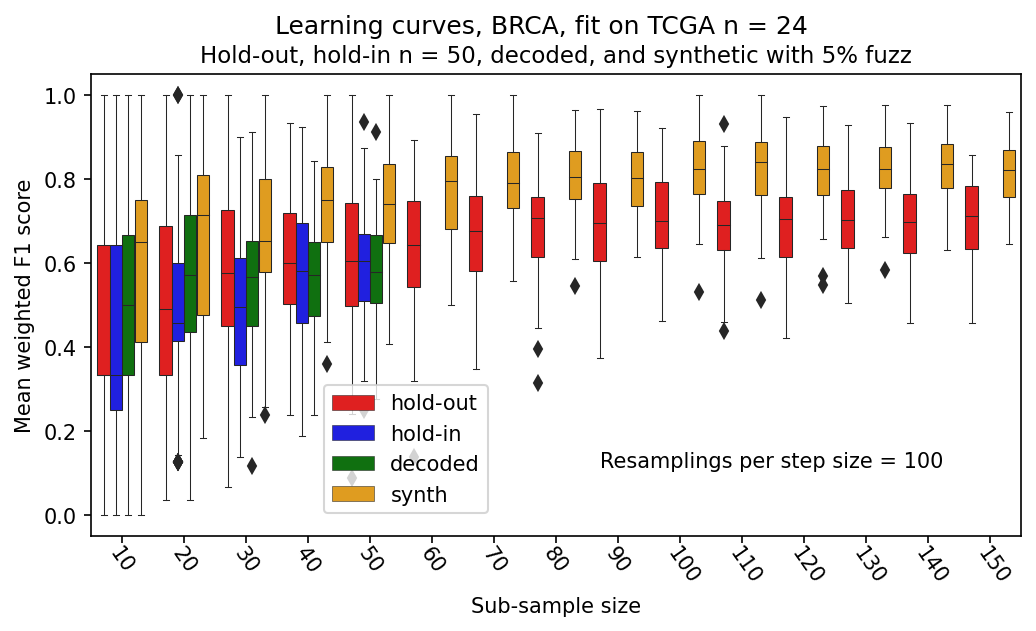

In [54]:
# Box curve - using hue function on data phase and step size
# Use a dataframe with input, decoded, and synthetic samples
figure(figsize=(8, 4), dpi=150)
ax = sns.boxplot(x='step_size', y='F1_score',
            hue='data_phase', palette=['red','blue', 'green', 'orange'],
            data=box_curve_frame, linewidth = .5)

# plt.plot(list(dec_RF_F1_means.keys()),
#        dec_RF_F1_means.values(),label='decoded', color = 'green')


plt.suptitle('Learning curves, '+fine_tune_file.index.name+', fit on TCGA n = 24')
# plt.title('VAE input data: MAD 5K GEXP')
plt.title('Hold-out, hold-in n = '+str(len(hold_in))+', decoded, and synthetic with 5% fuzz', fontsize = 11) # across or within cohorts
plt.ylabel('Mean weighted F1 score')
plt.xlabel('Sub-sample size')
plt.annotate('Resamplings per step size = '+str(resmpl_count),
                xy=(.5, .3), xycoords='figure fraction',
                horizontalalignment='left', verticalalignment='top',
                )
plt.legend(loc=(.25,.05))
ax.set_xticklabels(ax.get_xticklabels(),rotation=-55,
                   ha='left',
                   rotation_mode='anchor'
                  )
plt.savefig(
    'i_o/bx_crv4/lrn_crv/tcga_brca_bx_crv4_'+run+'.png', bbox_inches = 'tight')

##### Learning curve template

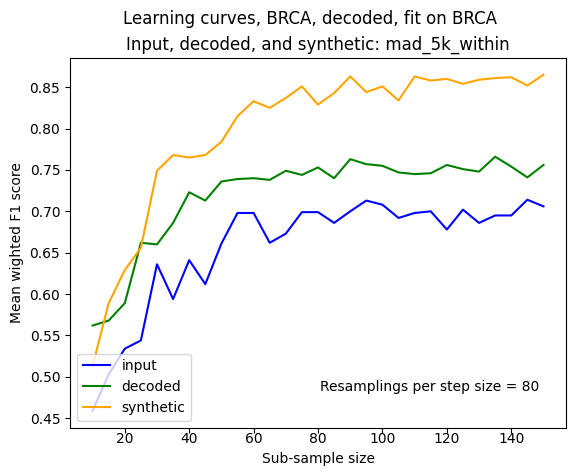

In [330]:
# Superimpose input, decoded, and synthetic, template for box curve
    # Using two dicts:
        # inpt_RF_F1_means
        # dec_RF_F1_means

plt.plot(list(inpt_RF_F1_means.keys()),
       inpt_RF_F1_means.values(),label='input', color = 'blue')
plt.plot(list(dec_RF_F1_means.keys()),
       dec_RF_F1_means.values(),label='decoded', color = 'green')
plt.plot(list(synth_RF_F1_means.keys()),
       synth_RF_F1_means.values(),label='synthetic', color = 'orange')

plt.suptitle('Learning curves, '+df_to_clf.index.name+', decoded, fit on '+
             df_to_clf.index.name)
# plt.title('VAE input data: MAD 5K GEXP')
plt.title('Input, decoded, and synthetic: ' + feature_set) # across or within cohorts
plt.ylabel('Mean wighted F1 score')
plt.xlabel('Sub-sample size')
plt.annotate('Resamplings per step size = '+str(resmpl_count),
                xy=(.5, .2), xycoords='figure fraction',
                horizontalalignment='left', verticalalignment='top',
                )
plt.legend(loc="lower left")
plt.savefig(
    'i_o/box_whisk/'+
    str(df_to_clf.index.name)+'.inpt_and_dec_fit_on.'+fit_on +'_'+feature_set+'_'+
    str(list(inpt_RF_F1_means.keys())[0])+'-to-'+str(smp_sz)+
    '_'+'rsmpls.'+str(resmpl_count)+
    '_super_1_synth.png', bbox_inches = 'tight')

### Made-up data

### Hold out - Input, Decoded, and Synth

In [ ]:
hold out - done
decoded hold out - need to use trained encoder, decoder
synthetic from decoded hold out

print hold out size
print hold in size

#### Hold out Input F1 object

In [332]:
df_to_rf = hold_out

In [333]:
print('Starting Hold out input learning curve object generation')

hld_ot_inpt_RF_F1_means = {}
for smp_sz in list(range(10, 151, 5)): # BRCA <--- across run, plot up to 100?
    
    print(smp_sz)
    
    RF_output = []
    resmpl_count = 80 # 250
    for r in list(range(0, resmpl_count)):
        
        labeled_sample_subset_frame = df_to_rf.sample(smp_sz)
        X = labeled_sample_subset_frame.iloc[:, 1:]
        y = labeled_sample_subset_frame.iloc[:, 0]
        X_train, X_test, y_train, y_test = train_test_split(
                    X, y,
                        test_size=0.33,
                            )
        RF_clf = RandomForestClassifier(max_depth=2)
        RF_clf.fit(X_train, y_train)

        RF_F1_scr = f1_score(y_test, RF_clf.predict(X_test), average='weighted')
        RF_output.append(RF_F1_scr)

    hld_ot_inpt_RF_F1_means[smp_sz] = round(mean(RF_output), 3)
    
    # INPUT dict - raw F1 scores for error plot <note>
    # inpt_RF_F1_dct[smp_sz] = RF_output
    # break
print('Hold-out input Learning curve object generated, send to plot function')

Starting Hold out input learning curve object generation
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
Hold-out input Learning curve object generated, send to plot function


#### Hold out Decoded F1 object

In [334]:
feature_set = 'mad_5k_within'
decode_df = hold_out
c = file.index.name
fit_on = c
super_v = '_hold-out'

In [335]:
itr

'box_whisk'

In [336]:
# No loss plot, here, not training

y_df = decode_df.Labels

decoded = pd.DataFrame(decoder.predict(encoder.predict(decode_df.iloc[:, 1:])),
                       index=decode_df.index, columns=decode_df.iloc[:, 1:].columns)

latent_object = pd.DataFrame(encoder.predict(decode_df.iloc[:, 1:]),
             index=decode_df.index,
                # columns=decode_df.iloc[:, 1:].columns # Columns are different because this is latent space
        )
latent_object.index.name = c
latent_object = pd.concat( [pd.DataFrame(y_df), latent_object] , axis =1)
latent_object.to_csv('i_o/'+itr+'/'+c+'_fit_on.'+fit_on+
                     '_latent_object_latent_dim.'+str(latent_dim)+
    '_epochs.'+str(epochs)+'_'+feature_set+super_v+
    '.tsv',
    sep = '\t')
# break
decoded_labeled = pd.concat( [pd.DataFrame(y_df), decoded] , axis =1)
decoded_labeled.to_csv(
    'i_o/'+itr+'/'+c+'_fit_on.'+fit_on+'_decoded_latent_dim.'+
    str(latent_dim)+
    '_epochs.'+str(epochs)+'_'+feature_set+super_v+
    '.tsv',
    sep = '\t')

In [337]:
df_to_clf = pd.read_csv(
    'i_o/box_whisk/BRCA_fit_on.BRCA_decoded_latent_dim.120_epochs.80_mad_5k_within_hold-out.tsv',
    sep = '\t', index_col = 0)

In [338]:
# Superimpose dictionary 2 (decoded) samples build, version super 0, now in figure_five

hld_ot_dec_RF_F1_means = {}
for smp_sz in list(range(10, 151, 5)): # BRCA <--- across run, mirror input steps above
    
    print(smp_sz)

    RF_output = []
    for r in list(range(0, resmpl_count)):
        
        labeled_sample_subset_frame = df_to_clf.sample(smp_sz) # df_to_clf set as decoded object now, not the input
        X = labeled_sample_subset_frame.iloc[:, 1:]
        y = labeled_sample_subset_frame.iloc[:, 0]
        X_train, X_test, y_train, y_test = train_test_split(
                    X, y,
                        test_size=0.33,
                            )
        RF_clf = RandomForestClassifier(max_depth=2)
        RF_clf.fit(X_train, y_train)

        RF_F1_scr = f1_score(y_test, RF_clf.predict(X_test), average='weighted')
        RF_output.append(RF_F1_scr)
           
    hld_ot_dec_RF_F1_means[smp_sz] = round(mean(RF_output), 3)

print('Second learning curve dictionary for superimpose plot done')

10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
Second learning curve dictionary for superimpose plot done


#### Synthetic from Decoded Hold out F1 object

In [339]:
chrt = 'BRCA'
latent_obj = pd.read_csv(
    'i_o/box_whisk/BRCA_fit_on.BRCA_latent_object_latent_dim.120_epochs.80_mad_5k_within_hold-out.tsv',
        sep = '\t', index_col = 0)

In [340]:
synth_ndx_strt = 0

synth_full_frame = pd.DataFrame()

for subtype in sorted(latent_obj.Labels.unique()):
    print(subtype)
    
    sub = latent_obj[latent_obj.Labels == subtype]
    synth_lat_feat_vec = []
    
    sub_len = len(sub)
    synth_sub_len = len(sub)*2
    
    synth_index = ['SYNTH-' + chrt + '-' + jtem for jtem in [str(
        item).zfill(5) for item in list(range(synth_ndx_strt,
                                              synth_sub_len + synth_ndx_strt))]]
    
    synth_sub_frame = pd.DataFrame(index = synth_index)
    synth_sub_frame.insert(0, 'Labels', sub.Labels[0])

    for lat_feat in sub.columns[1:]:

        lat_col = sub.loc[:, lat_feat]
        
        rand_lat_feat_vals = lat_col.sample(

            synth_sub_len, replace = True,

        )
        rand_lat_feat_vals.index = synth_index
        synth_sub_frame = pd.concat(
            [synth_sub_frame, rand_lat_feat_vals], axis = 1)

    synth_full_frame = pd.concat(
        [synth_full_frame, synth_sub_frame], axis = 0)
    synth_ndx_strt = synth_ndx_strt + synth_sub_len

BRCA_1
BRCA_2
BRCA_3
BRCA_4


In [341]:
synth_full_frame

,Labels,0,1,2,3,4,5,6,7,8,...,110,111,112,113,114,115,116,117,118,119
SYNTH-BRCA-00000,BRCA_1,0.305943,0.000000,1.012343,1.511696,1.927185,0.000000,1.368401,0.000000,0.000000,...,1.069443,0.193796,0.347717,0.000000,0.000000,0.312956,0.642466,0.475284,0.819861,0.555516
SYNTH-BRCA-00001,BRCA_1,0.000000,0.618625,0.431357,0.623724,0.000000,0.000000,0.291508,0.000000,0.000000,...,1.293553,0.000000,0.000000,0.000000,0.000000,0.589808,0.848942,1.477199,0.137750,0.594626
SYNTH-BRCA-00002,BRCA_1,0.000000,1.963241,0.000000,0.810918,0.000000,0.000000,0.000000,0.030998,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.971468,0.154200,0.957616,0.731654,0.195305,1.340720
SYNTH-BRCA-00003,BRCA_1,0.794886,0.286624,1.639823,1.502412,0.472589,0.000000,0.000000,0.402419,0.000000,...,0.000000,1.271559,0.000000,0.000000,0.000000,0.671997,2.120403,0.149687,0.344697,0.000000
SYNTH-BRCA-00004,BRCA_1,0.890828,1.963241,1.533001,1.281164,0.323941,2.469091,0.478906,0.000000,0.000000,...,0.684412,1.413718,0.000000,0.000000,1.286682,0.022155,0.000000,0.032499,0.000000,2.125566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SYNTH-BRCA-00995,BRCA_4,0.000000,0.857365,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.794510,...,0.000000,0.471138,0.000000,0.846612,1.332895,0.000000,0.815193,0.000000,0.000000,0.298652
SYNTH-BRCA-00996,BRCA_4,0.000000,1.194510,0.000000,0.000000,0.000000,0.571467,0.473491,0.965749,1.390114,...,0.499132,0.676084,0.561972,0.429470,0.000000,0.000000,0.000000,0.000000,1.337866,0.685839
SYNTH-BRCA-00997,BRCA_4,0.000000,0.000000,0.000000,0.000000,0.000000,1.416160,0.308208,0.000000,3.432365,...,0.018207,0.000000,0.000000,0.154154,0.000000,0.000000,0.641849,0.267730,1.838134,0.000000
SYNTH-BRCA-00998,BRCA_4,0.000000,0.975253,0.000000,0.000000,0.000000,1.808364,0.124006,0.004676,2.521417,...,1.110237,0.000000,0.000000,0.000000,0.000000,0.000000,0.877178,0.000000,0.083407,2.452142


In [342]:
synth_decoded = pd.DataFrame(decoder.predict(
    synth_full_frame.iloc[:, 1:]),
        index=synth_full_frame.index,
            columns=decode_df.iloc[:, 1:].columns)
synth_decoded_labeled = pd.concat(
    [pd.DataFrame(synth_full_frame.Labels),
     synth_decoded] , axis =1)
df_to_clf = synth_decoded_labeled

In [343]:
# Hold out synthetic, object 6 for Hold-out plot

hld_ot_synth_RF_F1_means = {}
    
for smp_sz in list(range(10, 151, 5)):
    print(smp_sz)
    RF_output = []
    for r in list(range(0, resmpl_count)):
        
        labeled_sample_subset_frame = df_to_clf.sample(smp_sz)
        X = labeled_sample_subset_frame.iloc[:, 1:]
        y = labeled_sample_subset_frame.iloc[:, 0]
        X_train, X_test, y_train, y_test = train_test_split(
                    X, y,
                        test_size=0.33,
                            )
        RF_clf = RandomForestClassifier(max_depth=2)
        RF_clf.fit(X_train, y_train)

        RF_F1_scr = f1_score(y_test, RF_clf.predict(X_test), average='weighted')
        RF_output.append(RF_F1_scr)
           
    hld_ot_synth_RF_F1_means[smp_sz] = round(mean(RF_output), 3)

print('BRCA hold out dict 3 done')

10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
BRCA hold out dict 3 done


In [345]:
df_to_clf.index.name = 'BRCA'

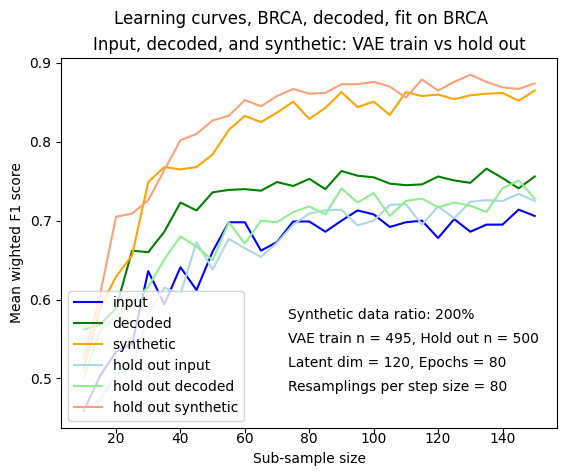

In [350]:
plt.plot(list(inpt_RF_F1_means.keys()),
       inpt_RF_F1_means.values(),label='input', color = 'blue')
plt.plot(list(dec_RF_F1_means.keys()),
       dec_RF_F1_means.values(),label='decoded', color = 'green')
plt.plot(list(synth_RF_F1_means.keys()),
       synth_RF_F1_means.values(),label='synthetic', color = 'orange')

plt.plot(list(hld_ot_inpt_RF_F1_means.keys()),
       hld_ot_inpt_RF_F1_means.values(),label='hold out input', color = 'lightblue')
plt.plot(list(hld_ot_dec_RF_F1_means.keys()),
       hld_ot_dec_RF_F1_means.values(),label='hold out decoded', color = 'lightgreen')
plt.plot(list(hld_ot_synth_RF_F1_means.keys()),
       hld_ot_synth_RF_F1_means.values(),label='hold out synthetic', color = 'lightsalmon')

plt.suptitle('Learning curves, '+df_to_clf.index.name+', decoded, fit on '+
             df_to_clf.index.name)
# plt.title('VAE input data: MAD 5K GEXP')
plt.title('Input, decoded, and synthetic: VAE train vs hold out') # across or within cohorts
plt.ylabel('Mean wighted F1 score')
plt.xlabel('Sub-sample size')
plt.annotate('Resamplings per step size = '+str(resmpl_count),
                xy=(.45, .2), xycoords='figure fraction',
                horizontalalignment='left', verticalalignment='top',
                )

plt.annotate('VAE train n = 495, Hold out n = 500',
                xy=(.45, .3), xycoords='figure fraction',
                horizontalalignment='left', verticalalignment='top',
                )

plt.annotate('Latent dim = 120, Epochs = 80',
                xy=(.45, .25), xycoords='figure fraction',
                horizontalalignment='left', verticalalignment='top',
                )

plt.annotate('Synthetic data ratio: 200%',
                xy=(.45, .35), xycoords='figure fraction',
                horizontalalignment='left', verticalalignment='top',
                )

plt.legend(loc="lower left")
plt.savefig(
    'i_o/box_whisk/'+
    str(df_to_clf.index.name)+'.inpt_and_dec_fit_on.'+fit_on +'_'+feature_set+'_'+
    str(list(inpt_RF_F1_means.keys())[0])+'-to-'+str(smp_sz)+
    '_'+'rsmpls.'+str(resmpl_count)+
    '_super_1_synth_hold_out.png', bbox_inches = 'tight')

### Box curve archive

In [ ]:
# Input template

print('starting learning curve generation on labled feature set')
# inpt_RF_F1_dct = {}

inpt_RF_F1_means = {}
# for smp_sz in list(range(10, 70, 5)): # UVM <--- across run, plot up to 100?
for smp_sz in list(range(10, 151, 5)): # BRCA <--- across run, plot up to 100?
# for smp_sz in list(range(15, 76, 5)): # ACC <---
    
    print(smp_sz)
    
    RF_output = []
    resmpl_count = 80 # 250
    for r in list(range(0, resmpl_count)):
        
        labeled_sample_subset_frame = df_to_rf.sample(smp_sz)
        X = labeled_sample_subset_frame.iloc[:, 1:]
        y = labeled_sample_subset_frame.iloc[:, 0]
        X_train, X_test, y_train, y_test = train_test_split(
                    X, y,
                        test_size=0.33,
                            )
        RF_clf = RandomForestClassifier(max_depth=2)
        RF_clf.fit(X_train, y_train)

        RF_F1_scr = f1_score(y_test, RF_clf.predict(X_test), average='weighted')
        RF_output.append(RF_F1_scr)

    inpt_RF_F1_means[smp_sz] = round(mean(RF_output), 3)
    
    # INPUT dict - raw F1 scores for error plot <note>
    # inpt_RF_F1_dct[smp_sz] = RF_output
    # break
print('Learning curve object generated, send to plot function')

In [ ]:
# Superimpose dictionary 2 (decoded) samples build, version super 0, now in figure_five

dec_RF_F1_means = {}
dec_RF_F1_dct = {}

for smp_sz in list(range(10, 41, 5)): # BRCA <--- across run, mirror input steps above
    
    print(smp_sz)

    RF_output = []
    # resmpl_count = 150
    for r in list(range(0, resmpl_count)):
        
        labeled_sample_subset_frame = df_to_clf.sample(smp_sz) # df_to_clf set as decoded object now, not the input
        X = labeled_sample_subset_frame.iloc[:, 1:]
        y = labeled_sample_subset_frame.iloc[:, 0]
        X_train, X_test, y_train, y_test = train_test_split(
                    X, y,
                        test_size=0.33,
                            )
        RF_clf = RandomForestClassifier(max_depth=2)
        RF_clf.fit(X_train, y_train)

        RF_F1_scr = f1_score(y_test, RF_clf.predict(X_test), average='weighted')
        RF_output.append(RF_F1_scr)
           
    dec_RF_F1_means[smp_sz] = round(mean(RF_output), 3)
    dec_RF_F1_dct[smp_sz] = RF_output
print('Second learning curve dictionary for superimpose plot done')

In [ ]:
# Synthetic sample generator template

synth_ndx_strt = 0

synth_full_frame = pd.DataFrame() # Storage object

# Take the reset starting index position from end of loop to create next synthetic subtype set

for subtype in sorted(latent_obj.Labels.unique()): # Subset the latent feature frame on each subtype
    
    print(subtype)
    
    # break
    
    sub = latent_obj[latent_obj.Labels == subtype]
    synth_lat_feat_vec = []
    
    sub_len = len(sub)
    synth_sub_len = len(sub)*1
    
    synth_index = ['SYNTH-' + chrt + '-' + jtem for jtem in [str(
        item).zfill(5) for item in list(range(synth_ndx_strt,
                                              synth_sub_len + synth_ndx_strt))]]
    # break
    
    synth_sub_frame = pd.DataFrame(index = synth_index) # create synthetic subframe
    synth_sub_frame.insert(0, 'Labels', sub.Labels[0])
    # break
    for lat_feat in sub.columns[1:]:               # Go through the subtype latent feature set,
        # print(lat_feat)                            # skipping the Labels column
        lat_col = sub.loc[:, lat_feat]
        
        rand_lat_feat_vals = lat_col.sample(
            # len(sub), replace = True, # <note> can toggle replacement off if taking less than number samples
            synth_sub_len, replace = True,
            # index = synth_index
        ) # *
        rand_lat_feat_vals.index = synth_index
        synth_sub_frame = pd.concat(
            [synth_sub_frame, rand_lat_feat_vals], axis = 1)
        # break
    synth_full_frame = pd.concat(
        [synth_full_frame, synth_sub_frame], axis = 0)
    # break
    
    # synth_ndx_strt = synth_ndx_strt + len(sub)
    synth_ndx_strt = synth_ndx_strt + synth_sub_len
    
    # break

In [ ]:
# Synthtic learing curve template for box curve, above

# dec_RF_F1_means = {}
synth_RF_F1_means = {}
# for smp_sz in list(range(10, 70, 5)): # UVM <--- figure_five, run 1
# for smp_sz in list(range(10, 145, 5)): # UVM <--- figure_five, run 2, this dict will be a different length! 
    
for smp_sz in list(range(10, 151, 5)): # BRCA <--- across run, mirror input steps above
    
    print(smp_sz)

    RF_output = []
    # resmpl_count = 150
    for r in list(range(0, resmpl_count)):
        
        labeled_sample_subset_frame = df_to_clf.sample(smp_sz) # df_to_clf set as decoded object now, not the input
        X = labeled_sample_subset_frame.iloc[:, 1:]
        y = labeled_sample_subset_frame.iloc[:, 0]
        X_train, X_test, y_train, y_test = train_test_split(
                    X, y,
                        test_size=0.33,
                            )
        RF_clf = RandomForestClassifier(max_depth=2)
        RF_clf.fit(X_train, y_train)

        RF_F1_scr = f1_score(y_test, RF_clf.predict(X_test), average='weighted')
        RF_output.append(RF_F1_scr)
           
    synth_RF_F1_means[smp_sz] = round(mean(RF_output), 3)

print('BRCA dict 3 done')